The purpose of this notebook is to see how data from Volvo looks like

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
VACT_EPOCH = datetime.datetime(year=2011,month=6,day=16,hour=5,minute=23,second=0)
def getDate(value):
    return VACT_EPOCH + datetime.timedelta(milliseconds=int(value))

In [3]:
pickles = {}
for set_num in ['369', '370', '371', '372', '375']:
    pickles['data-'+set_num] = pd.read_pickle('../data/mixed/volvo-buses/data-'+ set_num +'.pickle')
    pickles['data-'+set_num].Timestamp = pickles['data-'+set_num].Timestamp.apply(getDate)
    pickles['data-'+set_num] = pickles['data-'+set_num].set_index("Timestamp")
    print(set_num, ' loaded')
    
    # break point for not loading all data at once (unefficient) 
    # break

369  loaded
370  loaded
371  loaded
372  loaded
375  loaded


In [4]:
data = pickles['data-369']
data

,WetTankAirPressure,LongitudAcc,EngineSpeed,Fuel Rate,Engine Load,Boost Pressure,EngineAirInletPressure,AcceleratorPedalPos,VehicleSpeed,BrakePedalPos
Timestamp,,,,,,,,,,
2012-04-15 08:23:47.763,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
2012-04-15 08:23:48.457,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
2012-04-15 08:23:49.550,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
2012-04-15 08:23:50.715,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
2012-04-15 08:23:51.435,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:27:06.824,11.65255,-0.2,596.500,4.081143,24.0,0.008618,102.0,0.0,2.331882,0.0
2014-01-31 19:27:07.994,11.58360,-0.4,616.750,3.430526,19.5,0.000000,102.0,0.0,1.796760,11.2
2014-01-31 19:27:08.672,11.51465,0.0,573.000,3.726261,20.5,0.000000,102.0,0.0,0.000000,18.4


In [5]:
# print(type(data))
# import pandas_profiling
# profile = data.profile_report()
# profile.to_file("report.html")

Service: 02/07/2012 for 369. 370 seems normal(?). For 371 this period seems weird, but I'm not sure about anomaly. 372, 375 - this period is not in time range of this bus. 

In [6]:
data = data.resample("24H").mean()
data

,WetTankAirPressure,LongitudAcc,EngineSpeed,Fuel Rate,Engine Load,Boost Pressure,EngineAirInletPressure,AcceleratorPedalPos,VehicleSpeed,BrakePedalPos
Timestamp,,,,,,,,,,
2012-04-15,11.141084,-0.037959,1089.886773,14.105021,26.691089,0.196294,120.988439,36.844913,37.849459,2.525539
2012-04-16,11.134603,-0.048292,1071.569373,14.714535,29.504453,0.217928,123.120943,40.010630,45.644900,2.529343
2012-04-17,11.059663,-0.042607,1083.491900,14.412841,28.857388,0.218065,122.558850,29.165305,41.050799,2.449420
2012-04-18,11.102981,-0.037259,1076.648174,14.880487,29.308227,0.235860,123.742262,36.261830,39.753853,3.353076
2012-04-19,11.100001,-0.035246,1095.895661,15.386417,30.916317,0.243552,124.551620,43.011646,43.559148,3.734834
...,...,...,...,...,...,...,...,...,...,...
2014-01-27,11.106167,-0.034299,1083.722028,15.433865,31.779527,0.237390,124.237809,40.134373,37.558118,3.569245
2014-01-28,11.139244,-0.017201,1086.640858,15.951165,31.746292,0.244850,125.829870,42.070274,36.800505,3.160637
2014-01-29,11.114956,-0.025378,1083.718657,15.853708,31.920387,0.245594,126.614334,40.329752,36.432832,3.351679


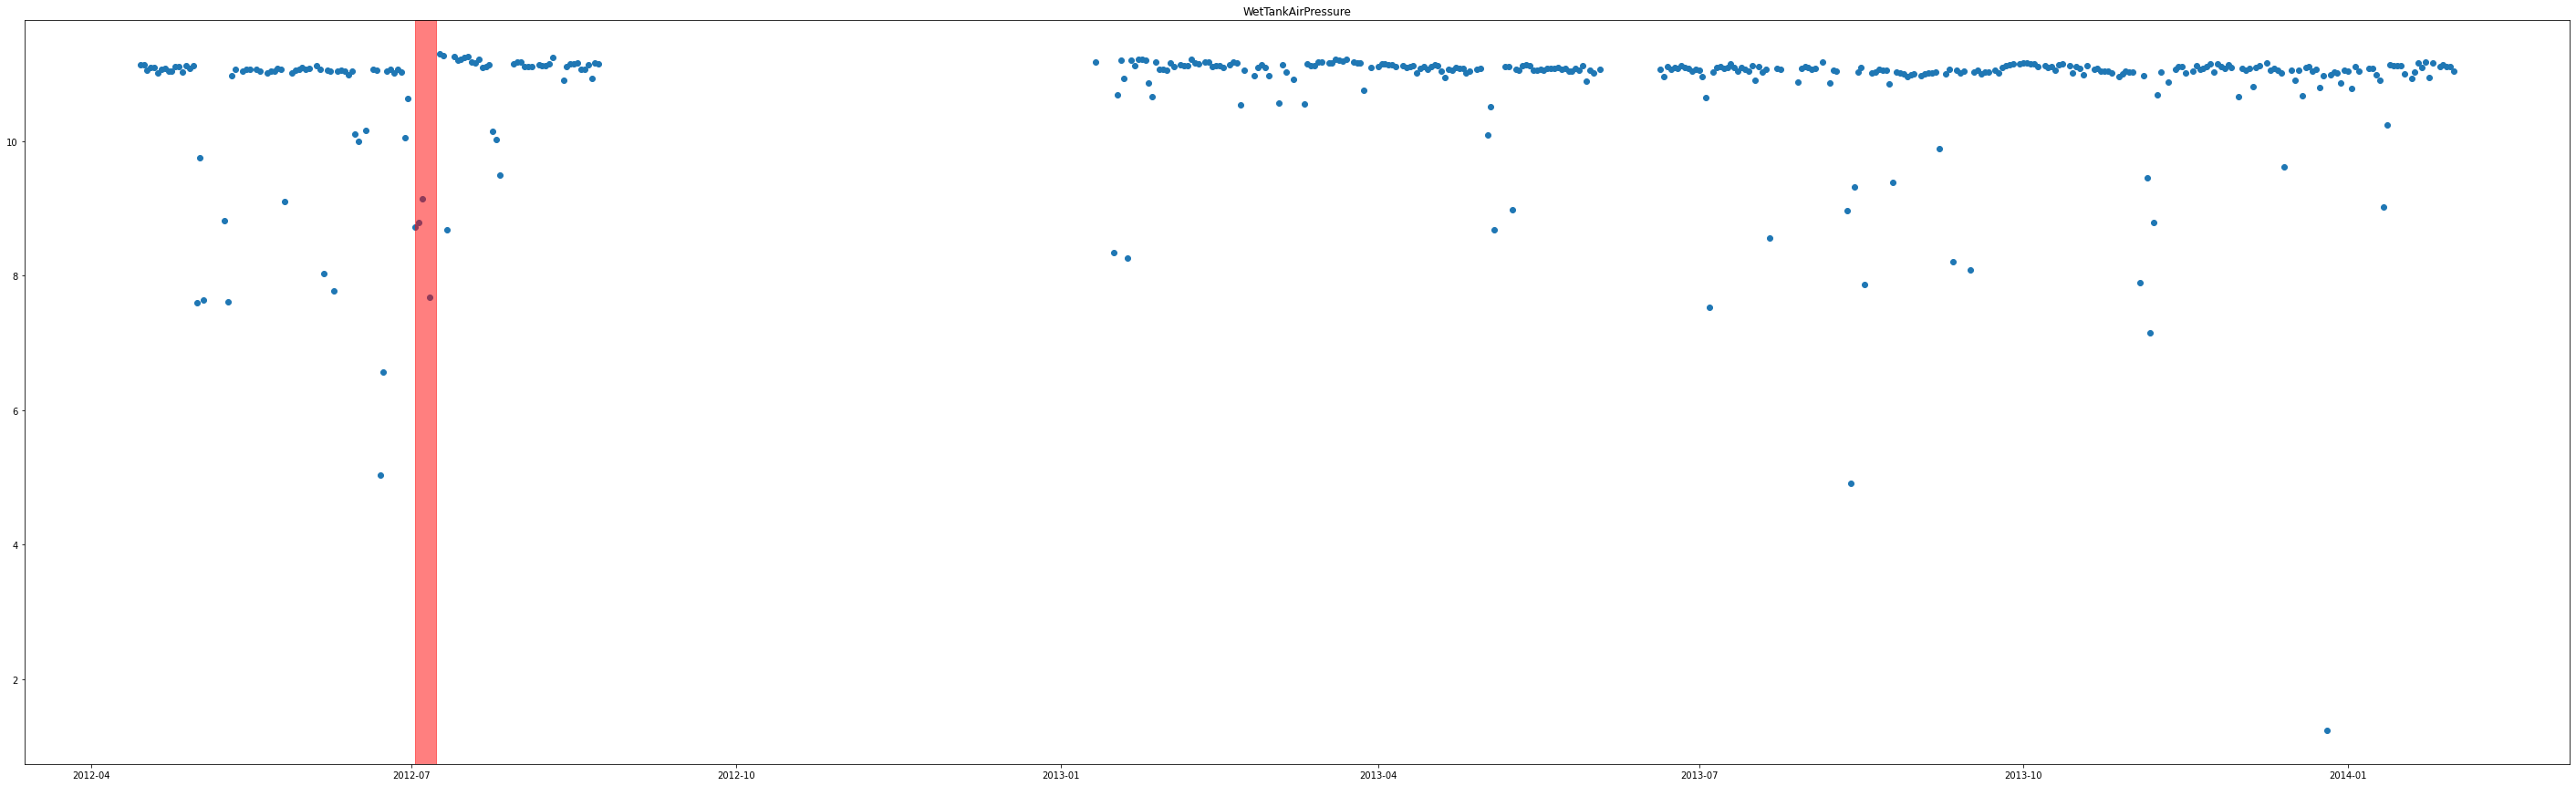

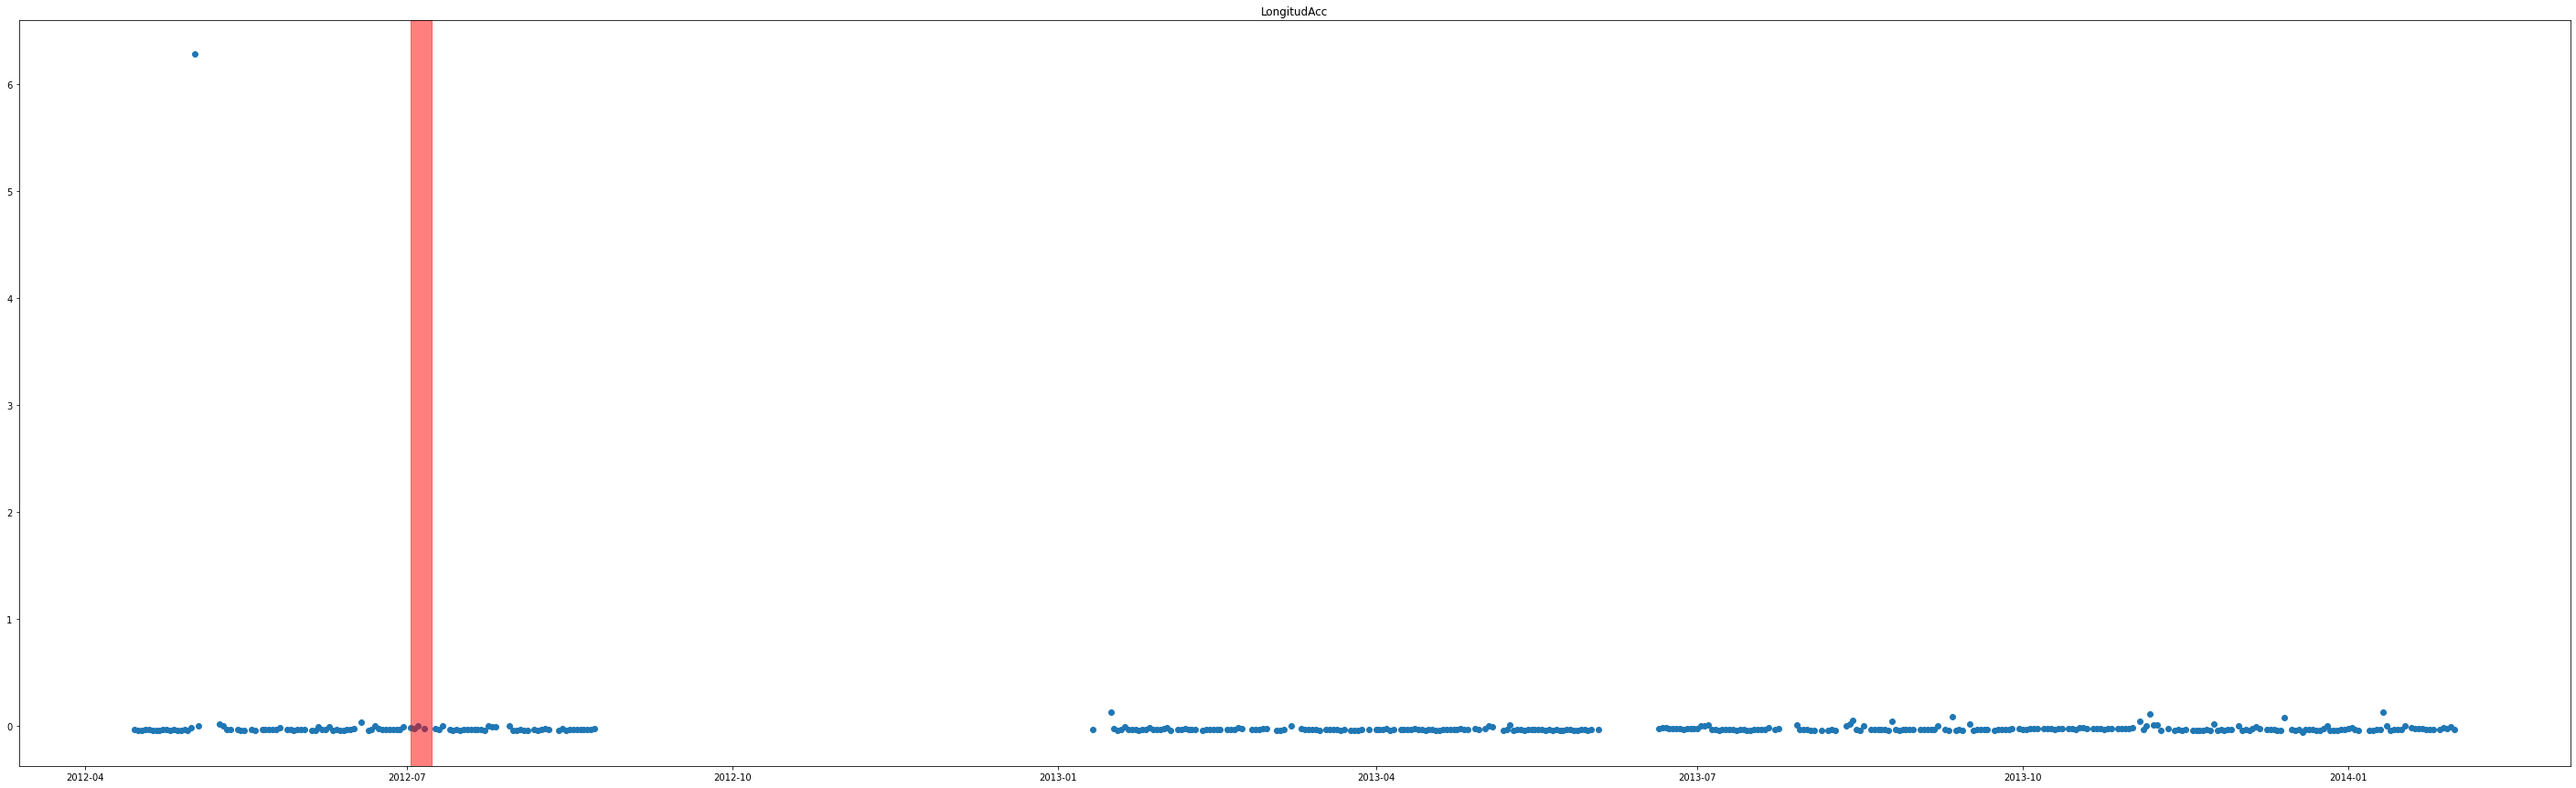

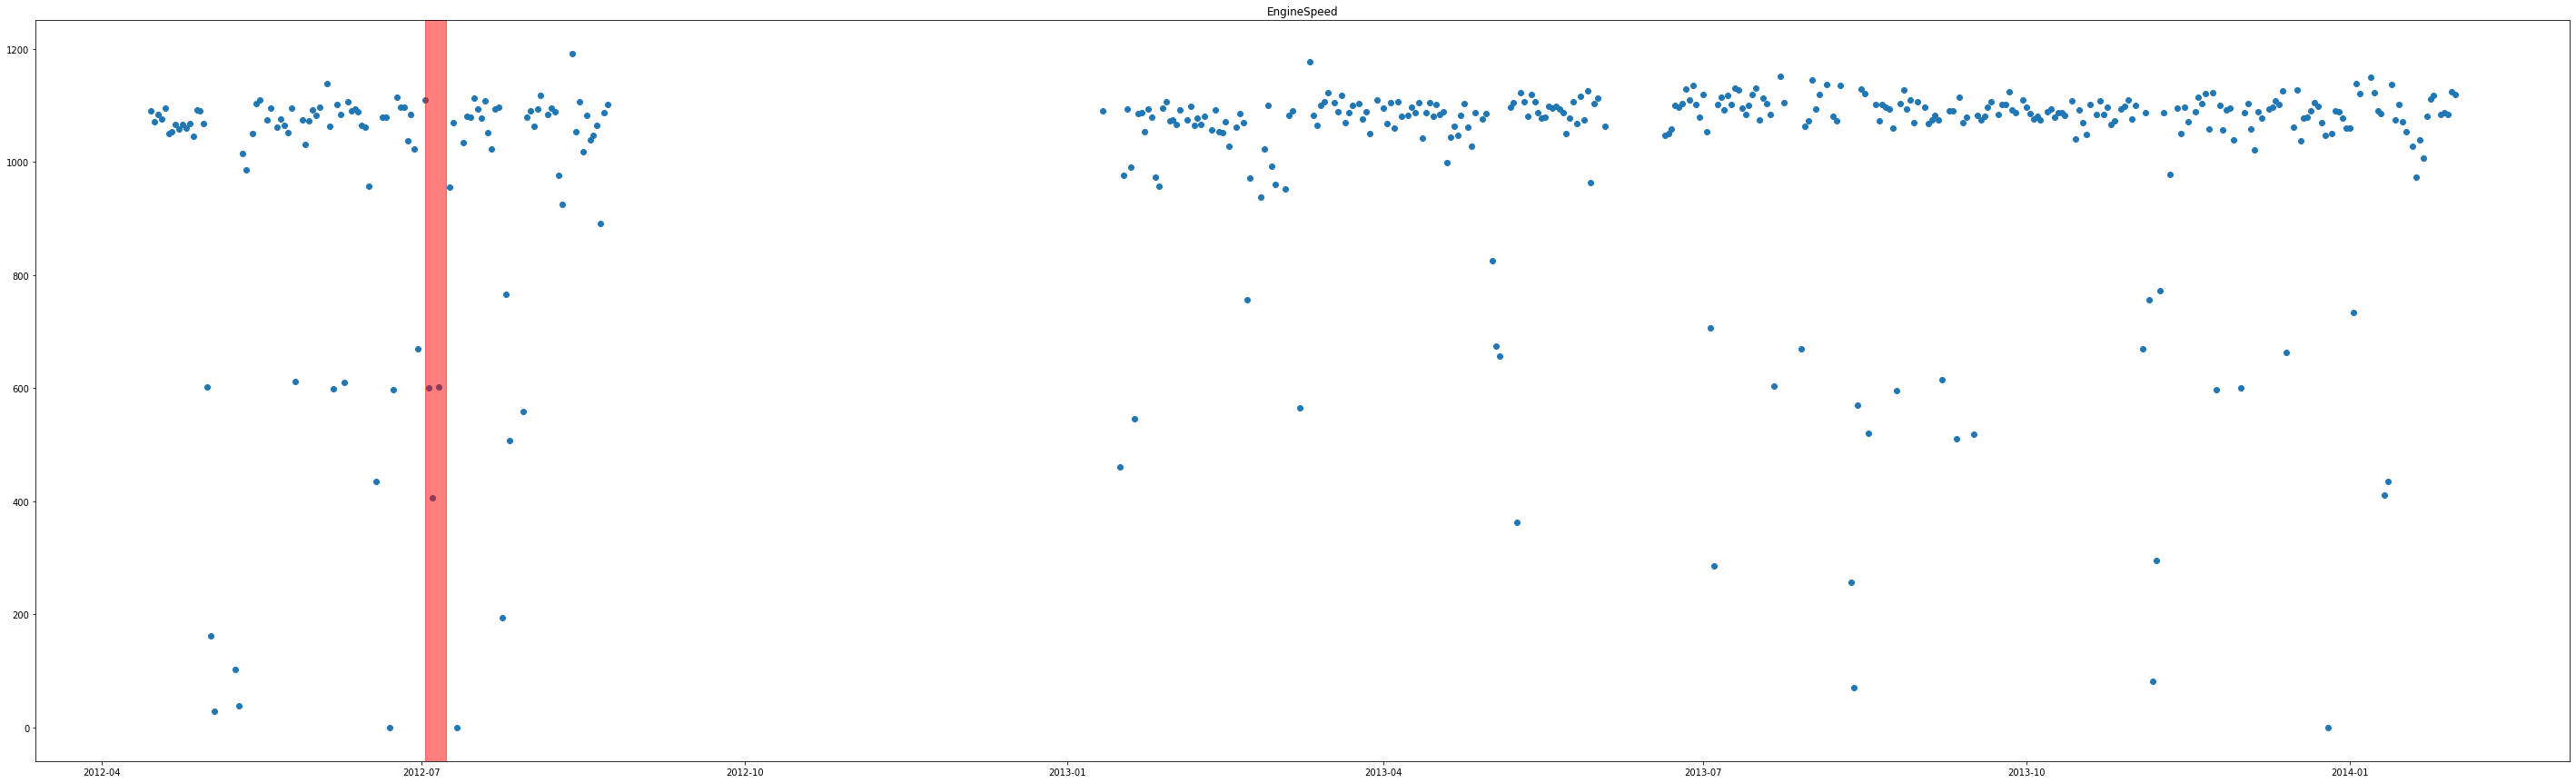

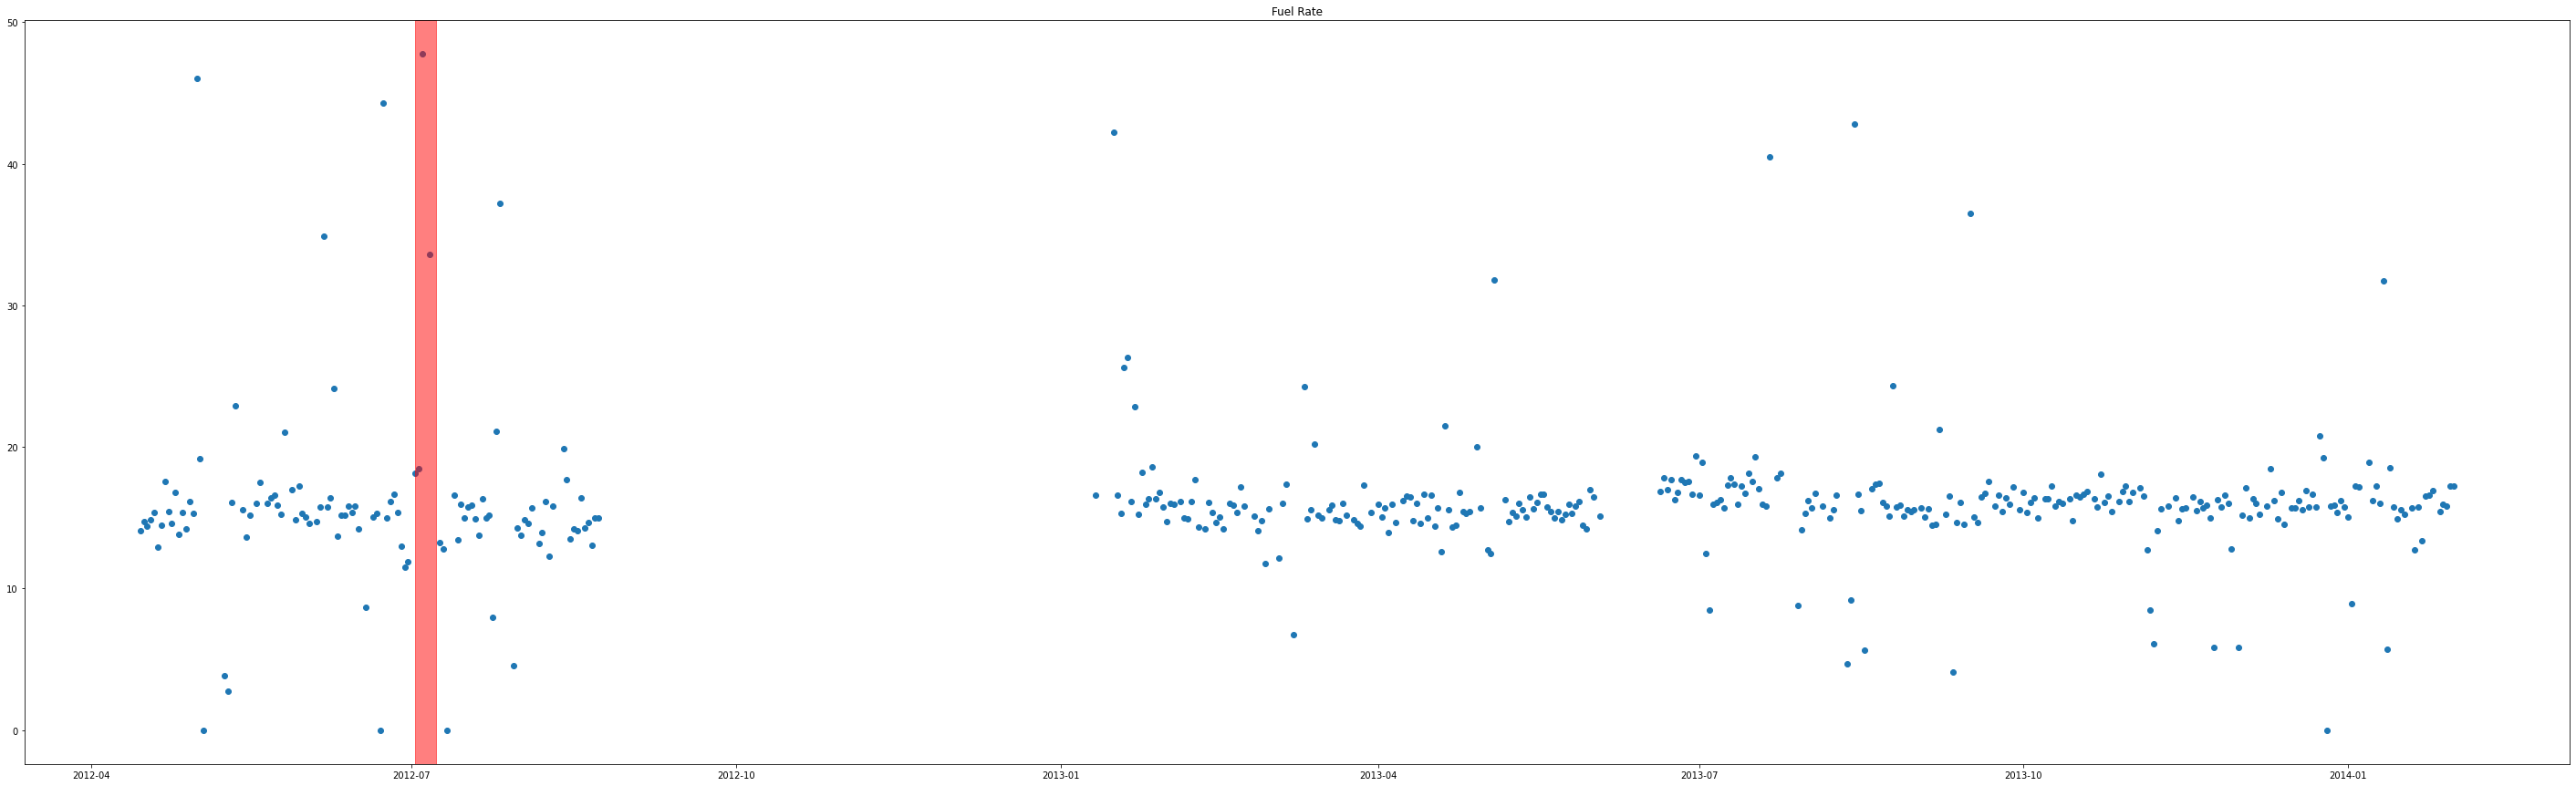

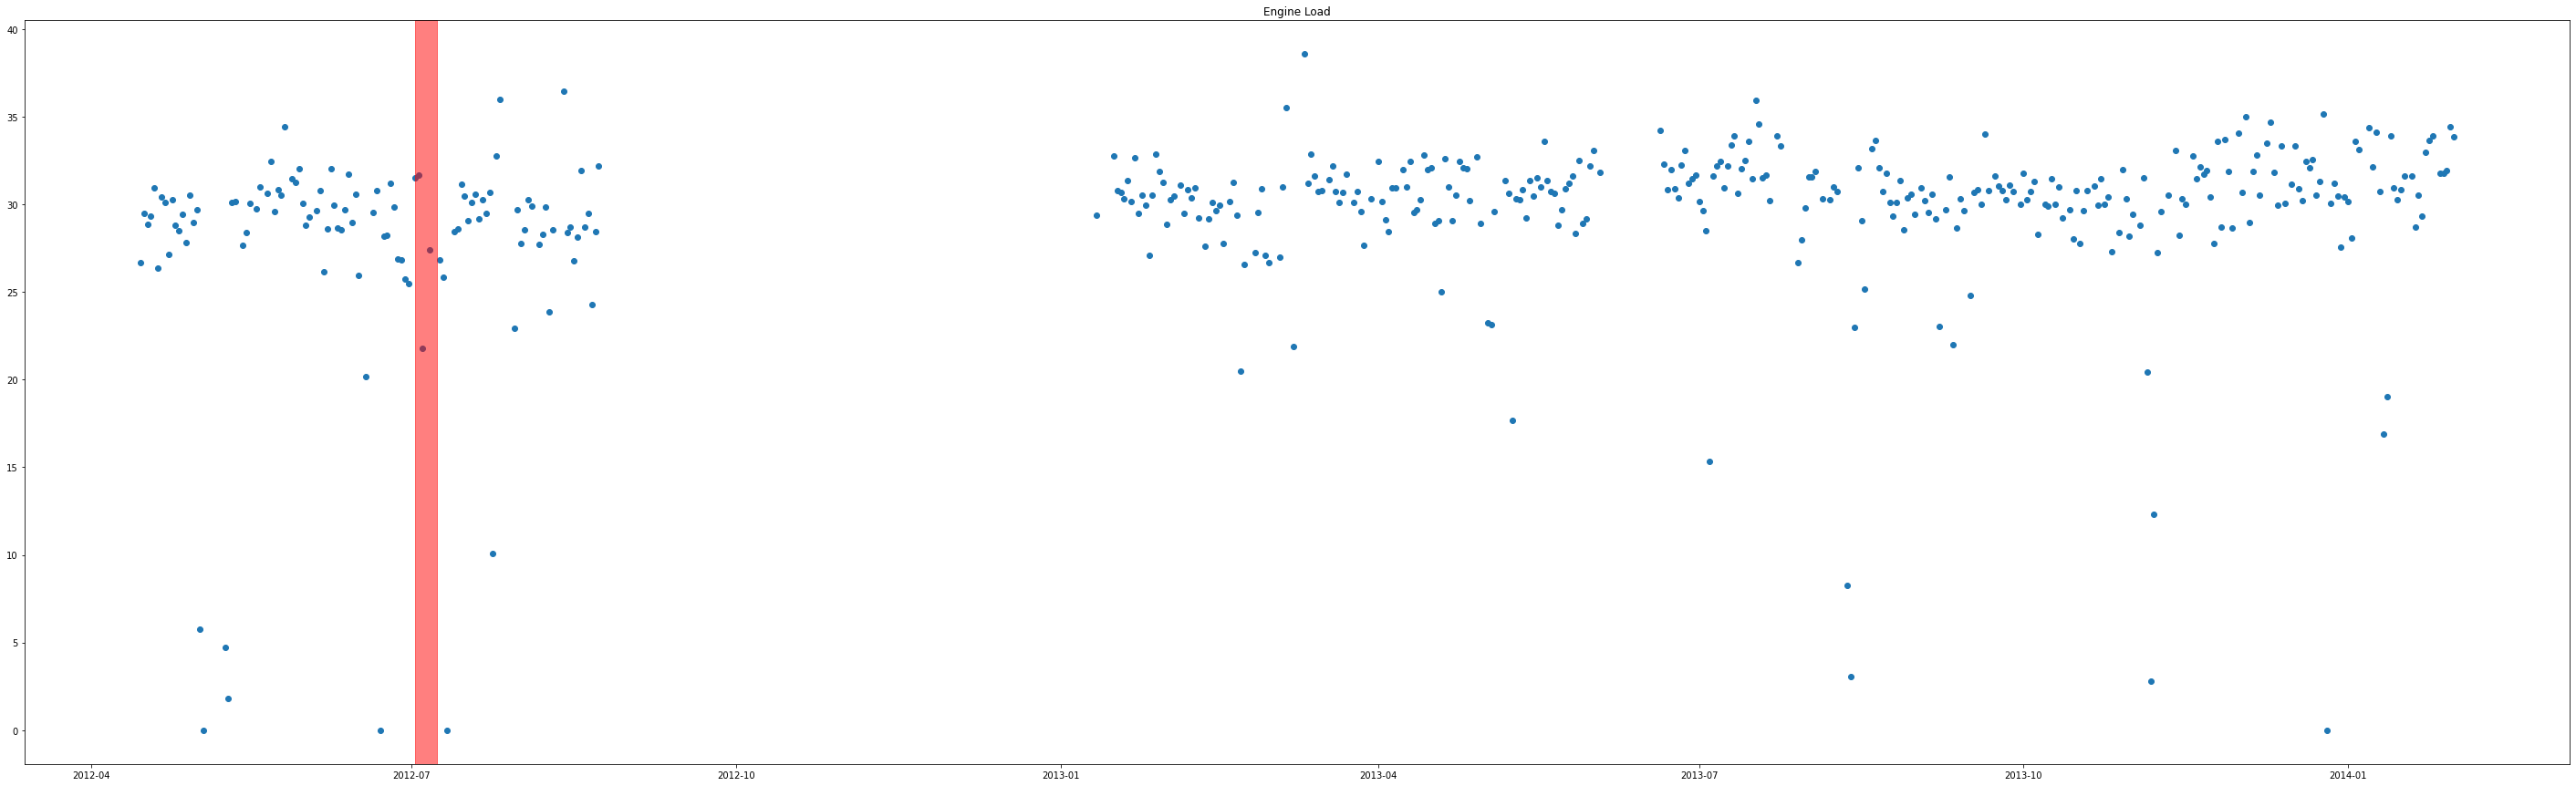

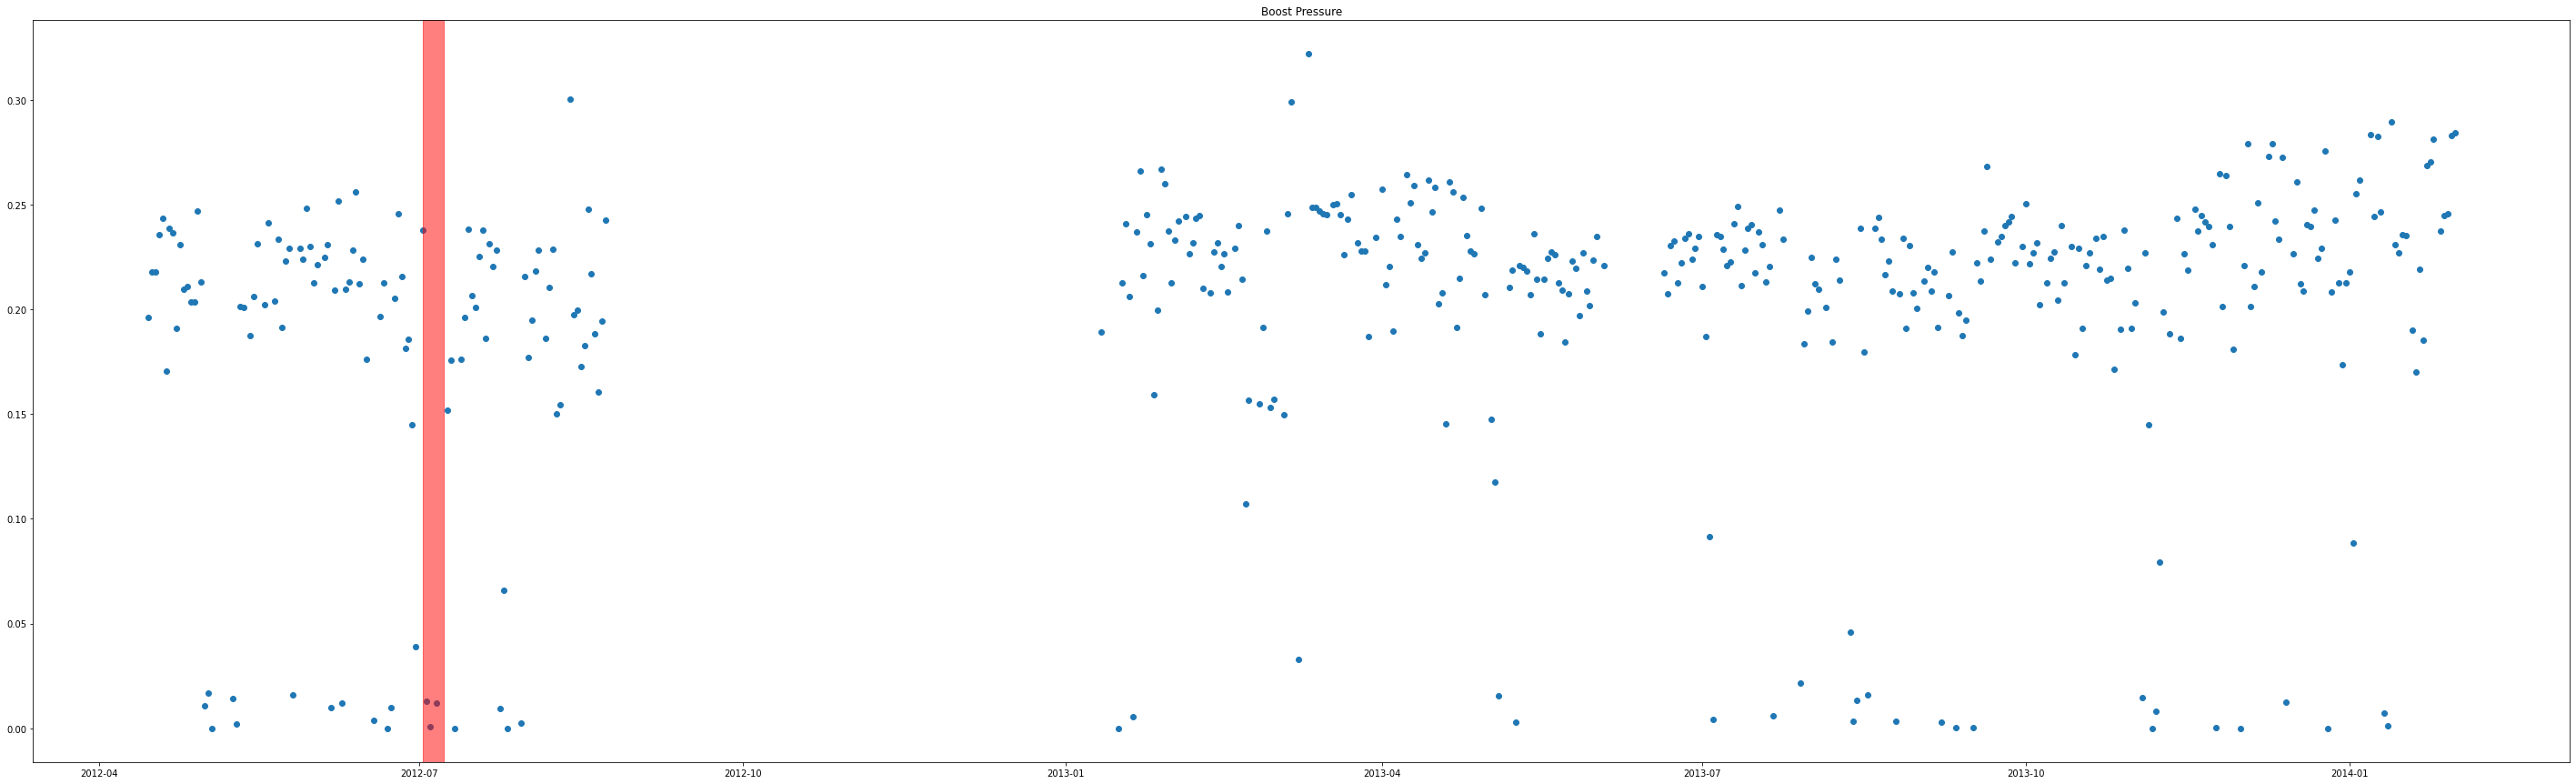

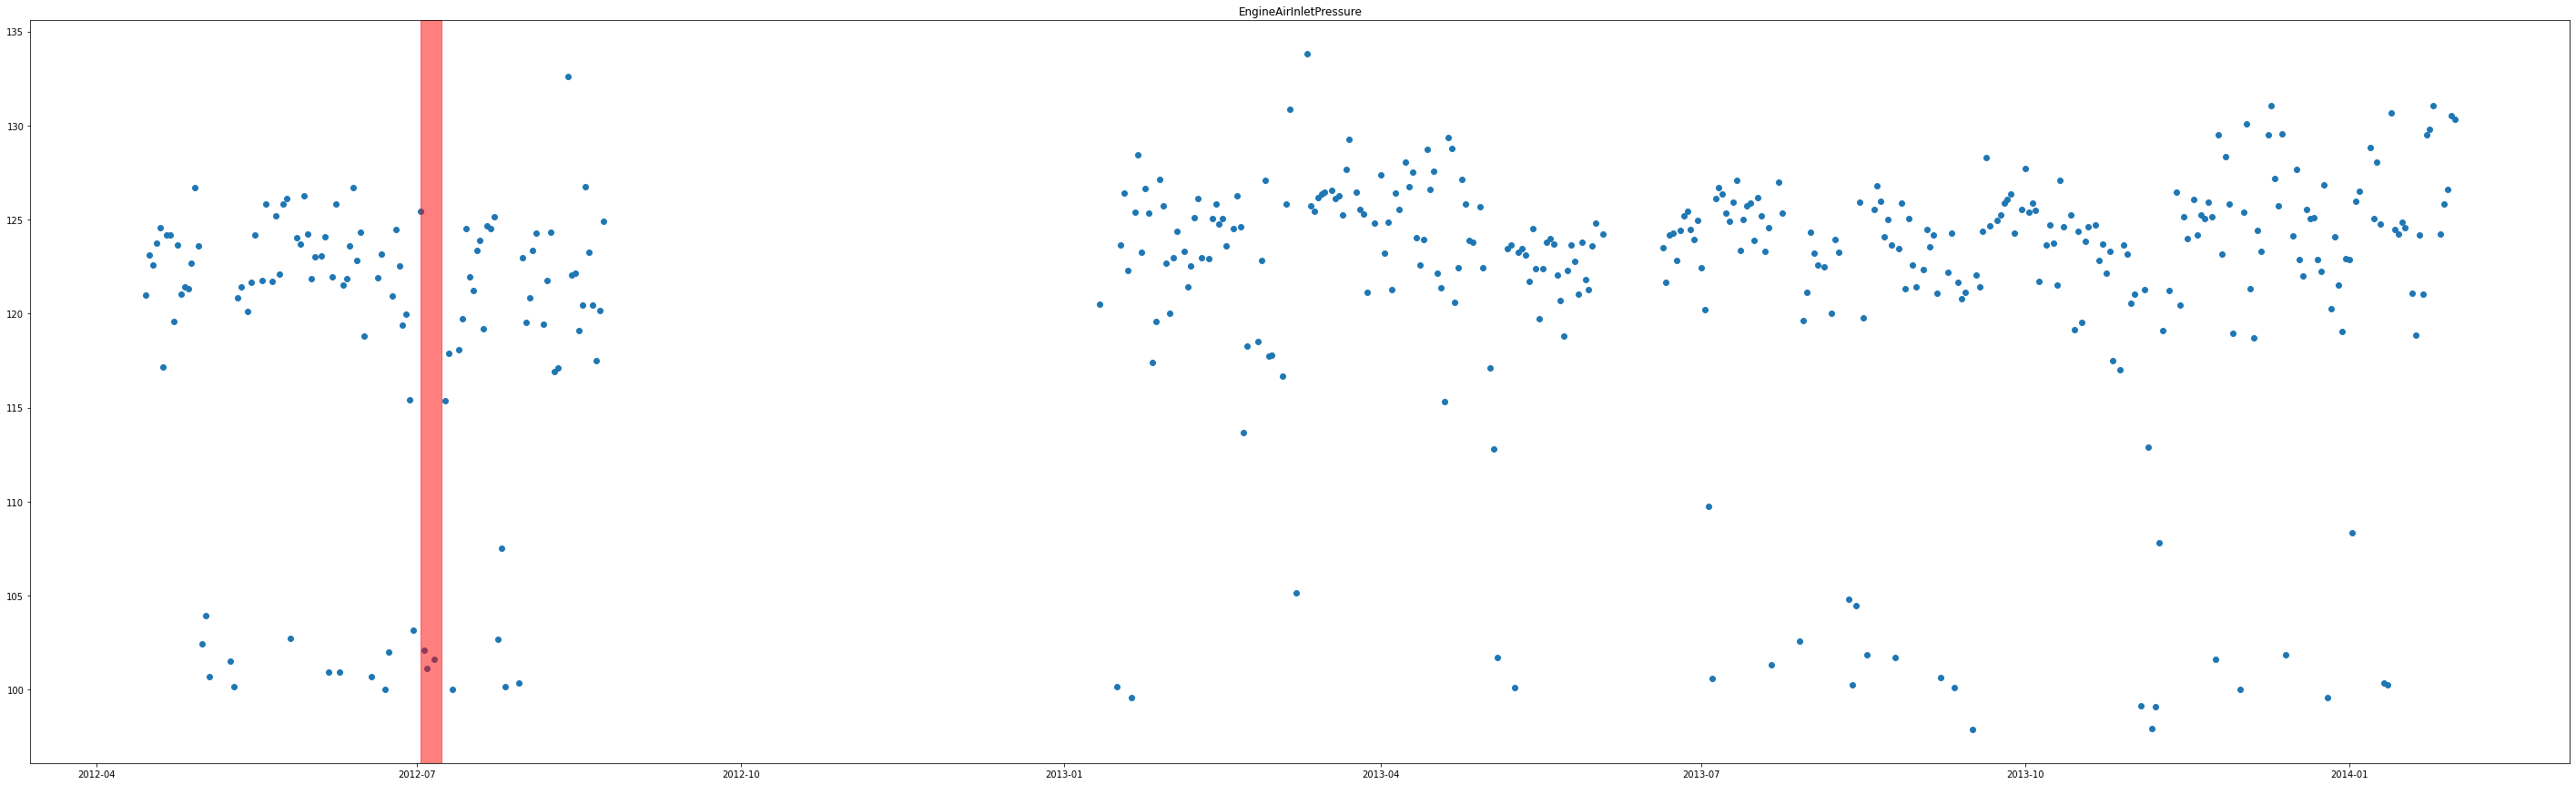

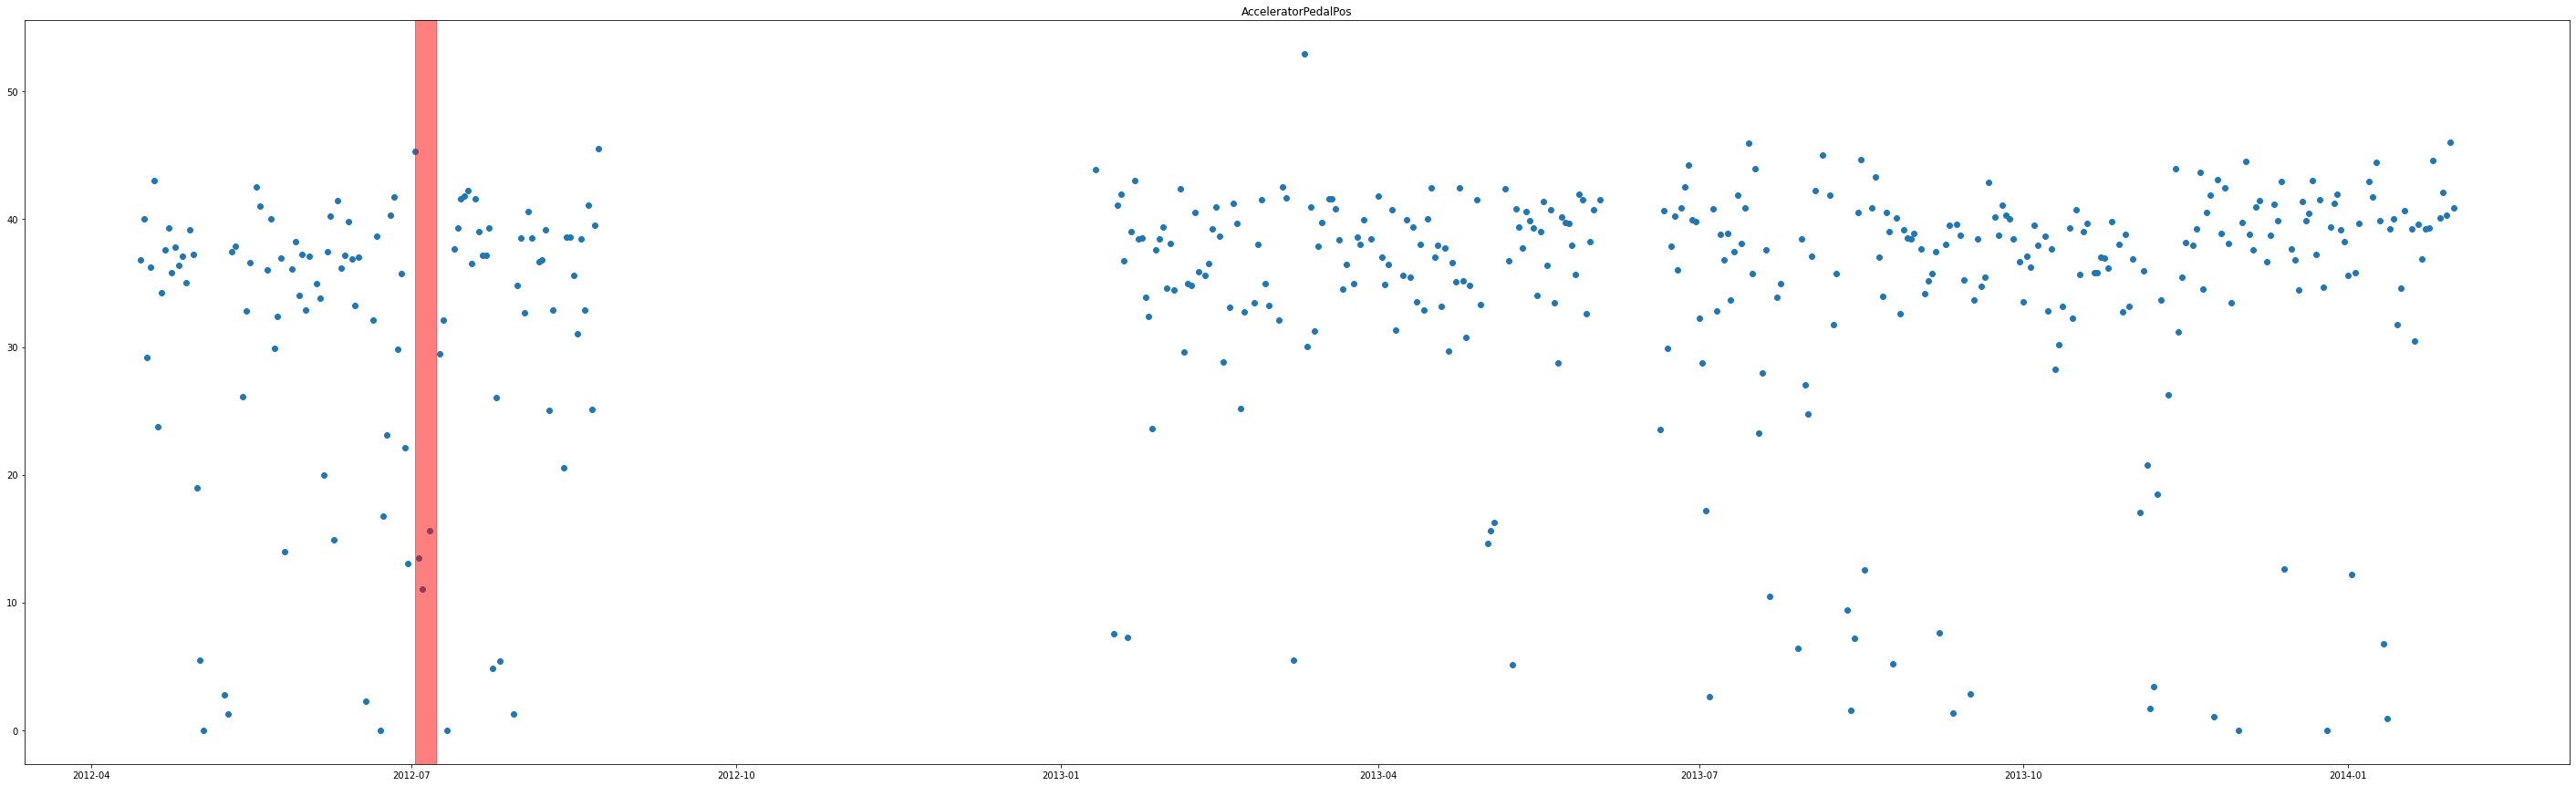

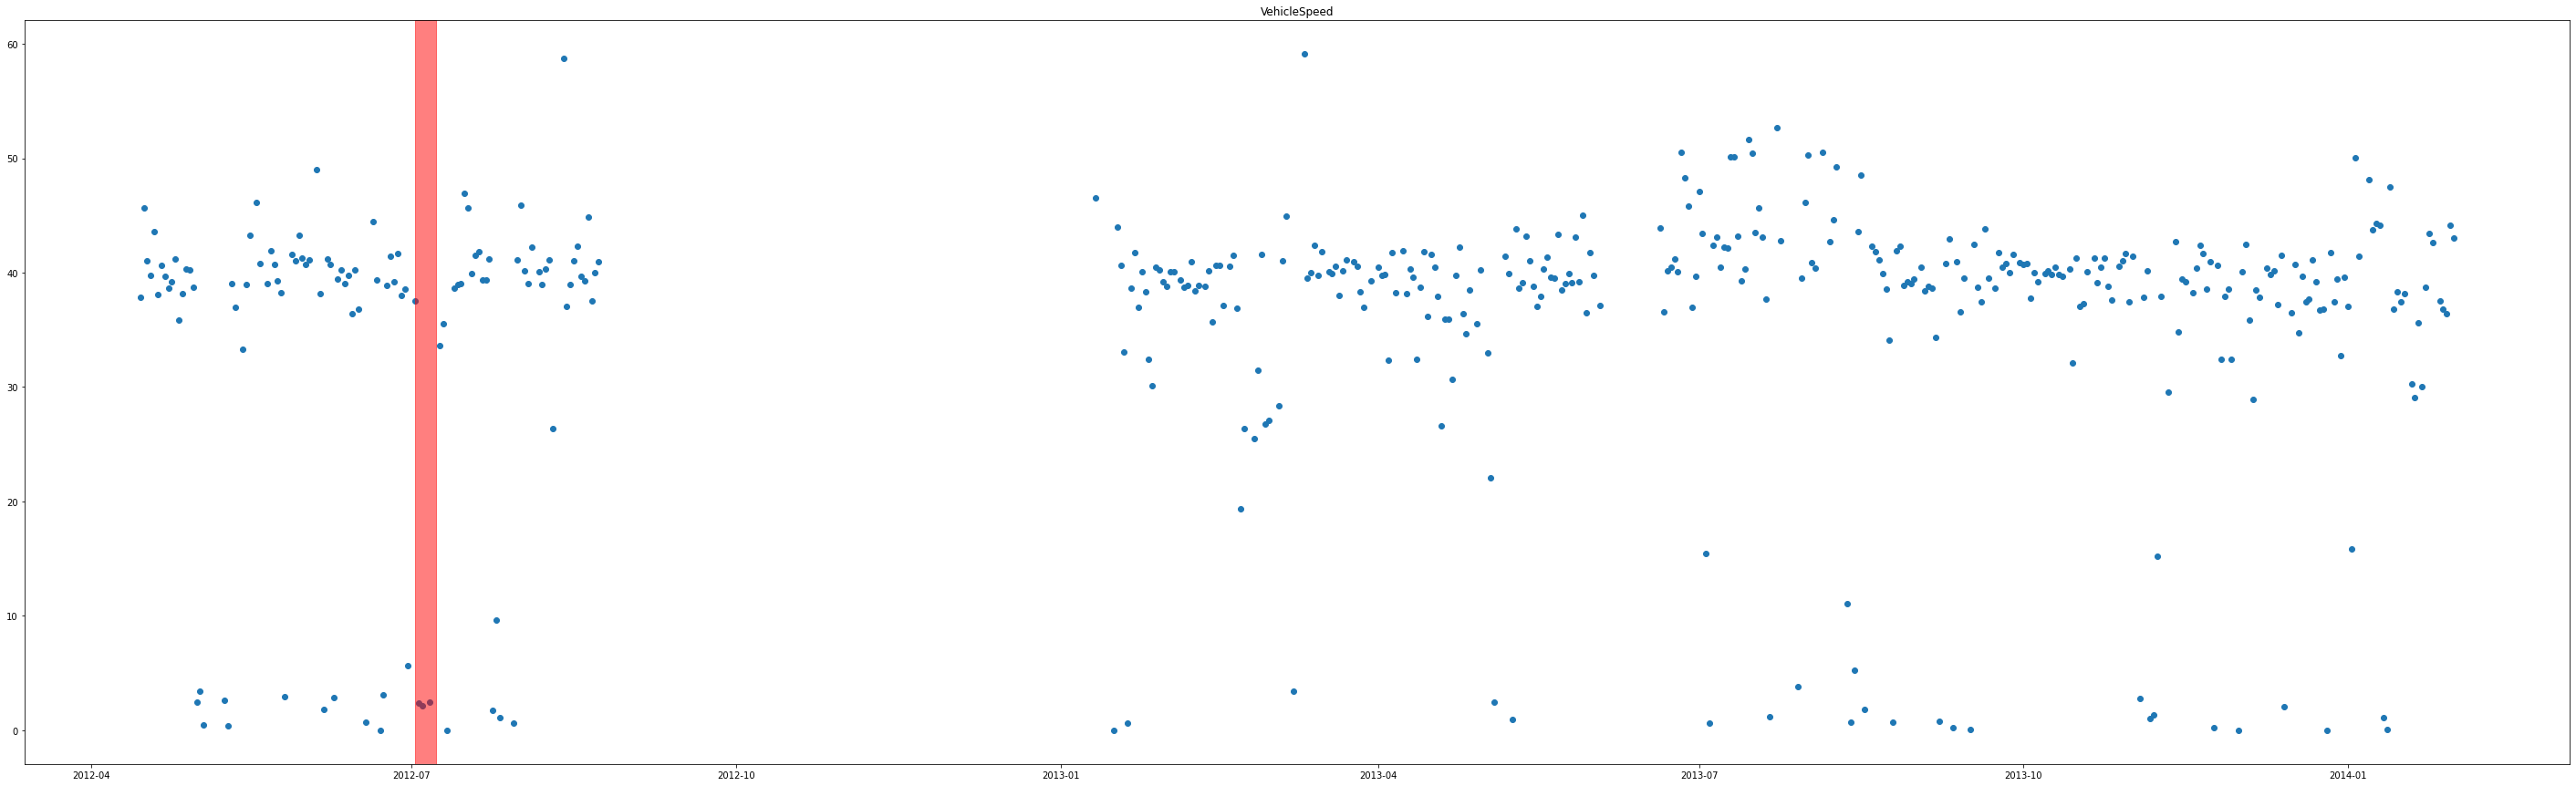

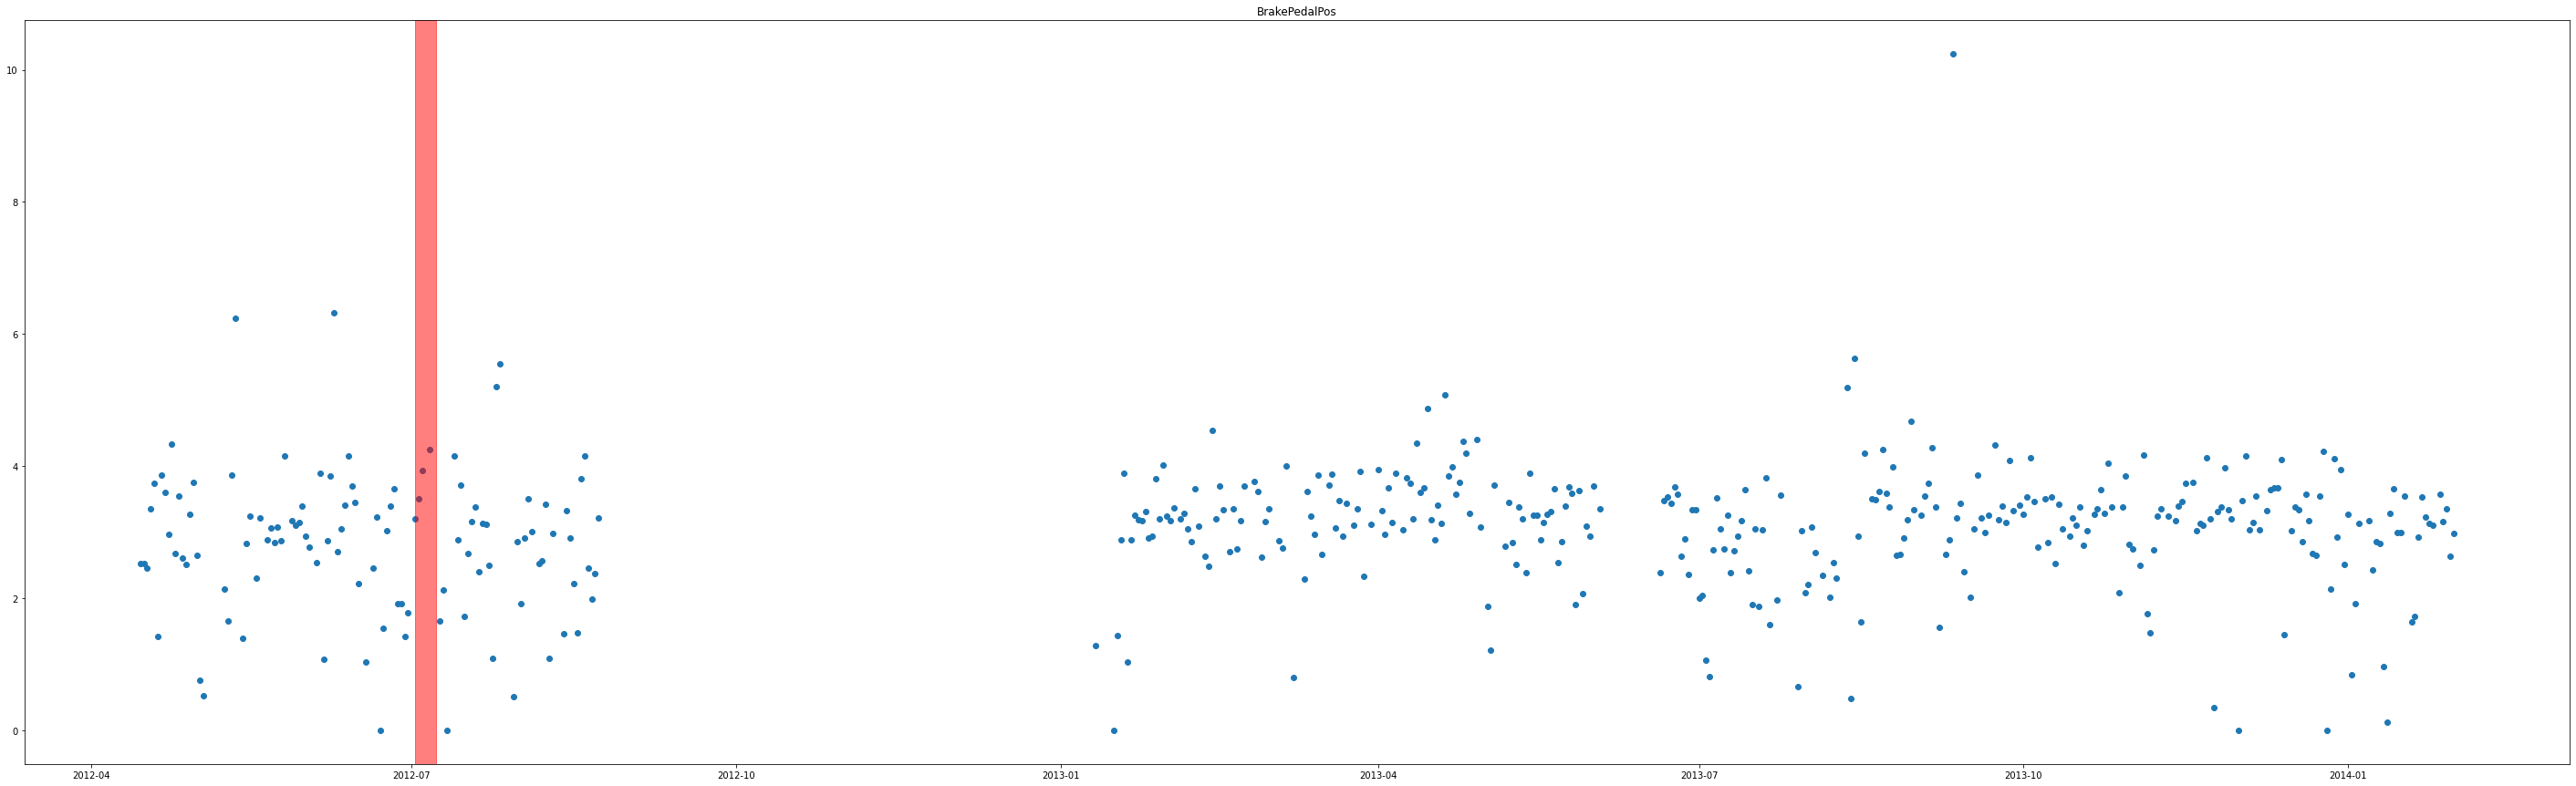

In [7]:
for col in data.columns:          
    f = plt.figure(figsize=(50, 15))
    plt.scatter(x=data.index, y=data[col])
    plt.title(col)
    plt.axvspan(datetime.datetime(year=2012,month=7,day=2,hour=0,minute=0,second=1), datetime.datetime(year=2012,month=7,day=8,hour=0,minute=0,second=1), color='red', alpha=0.5)
    plt.show()


# More buses

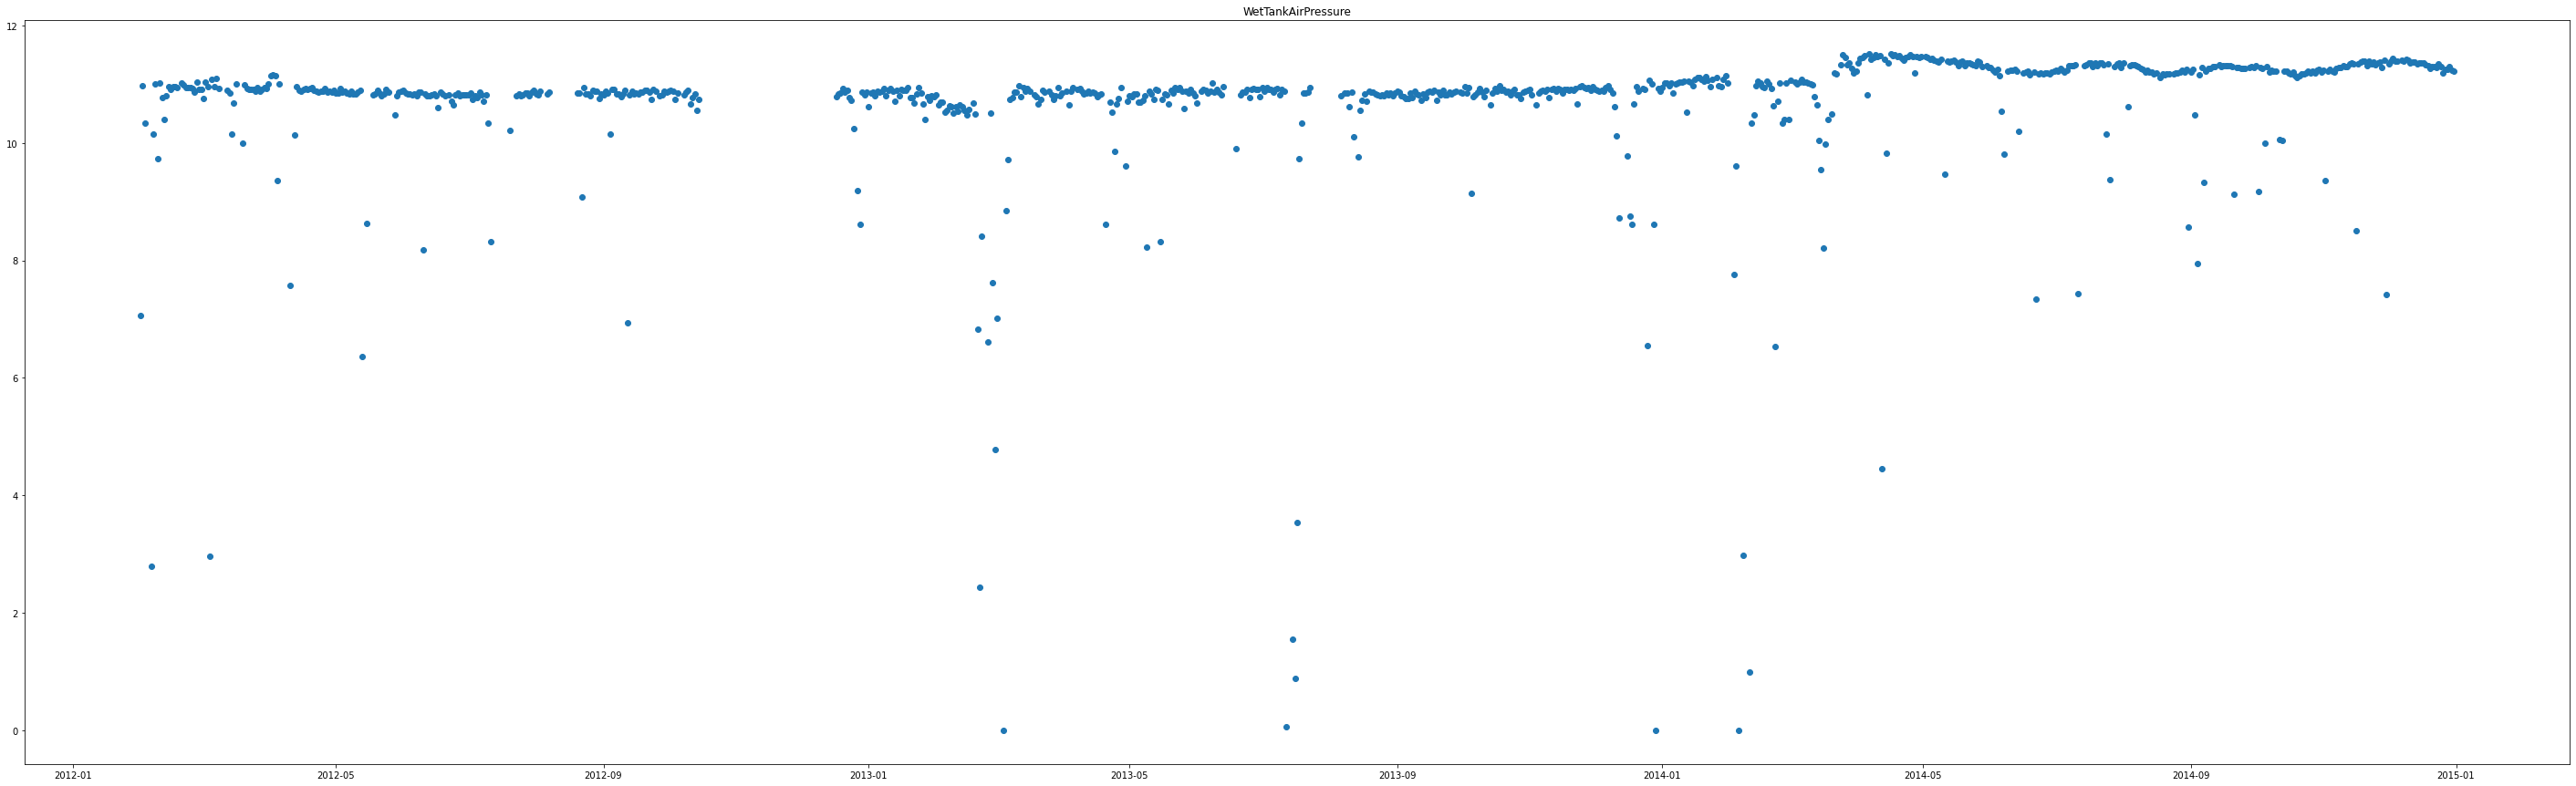

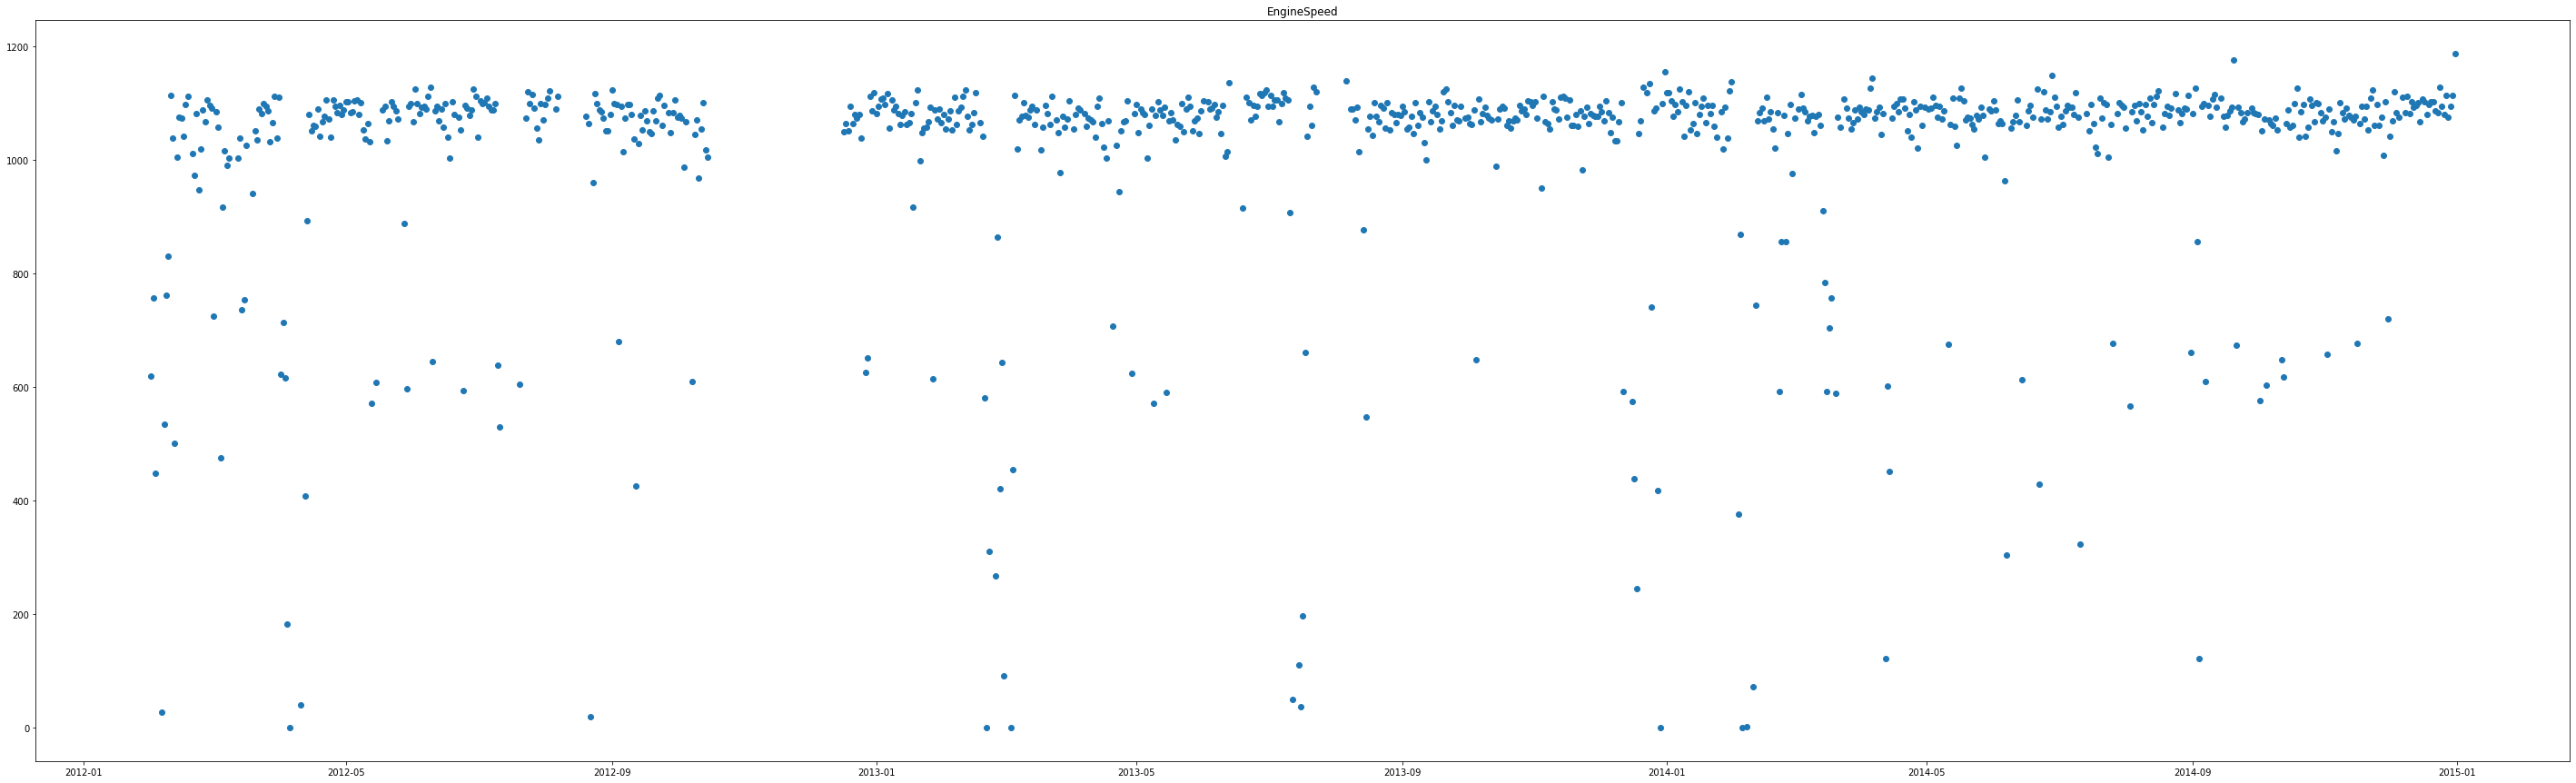

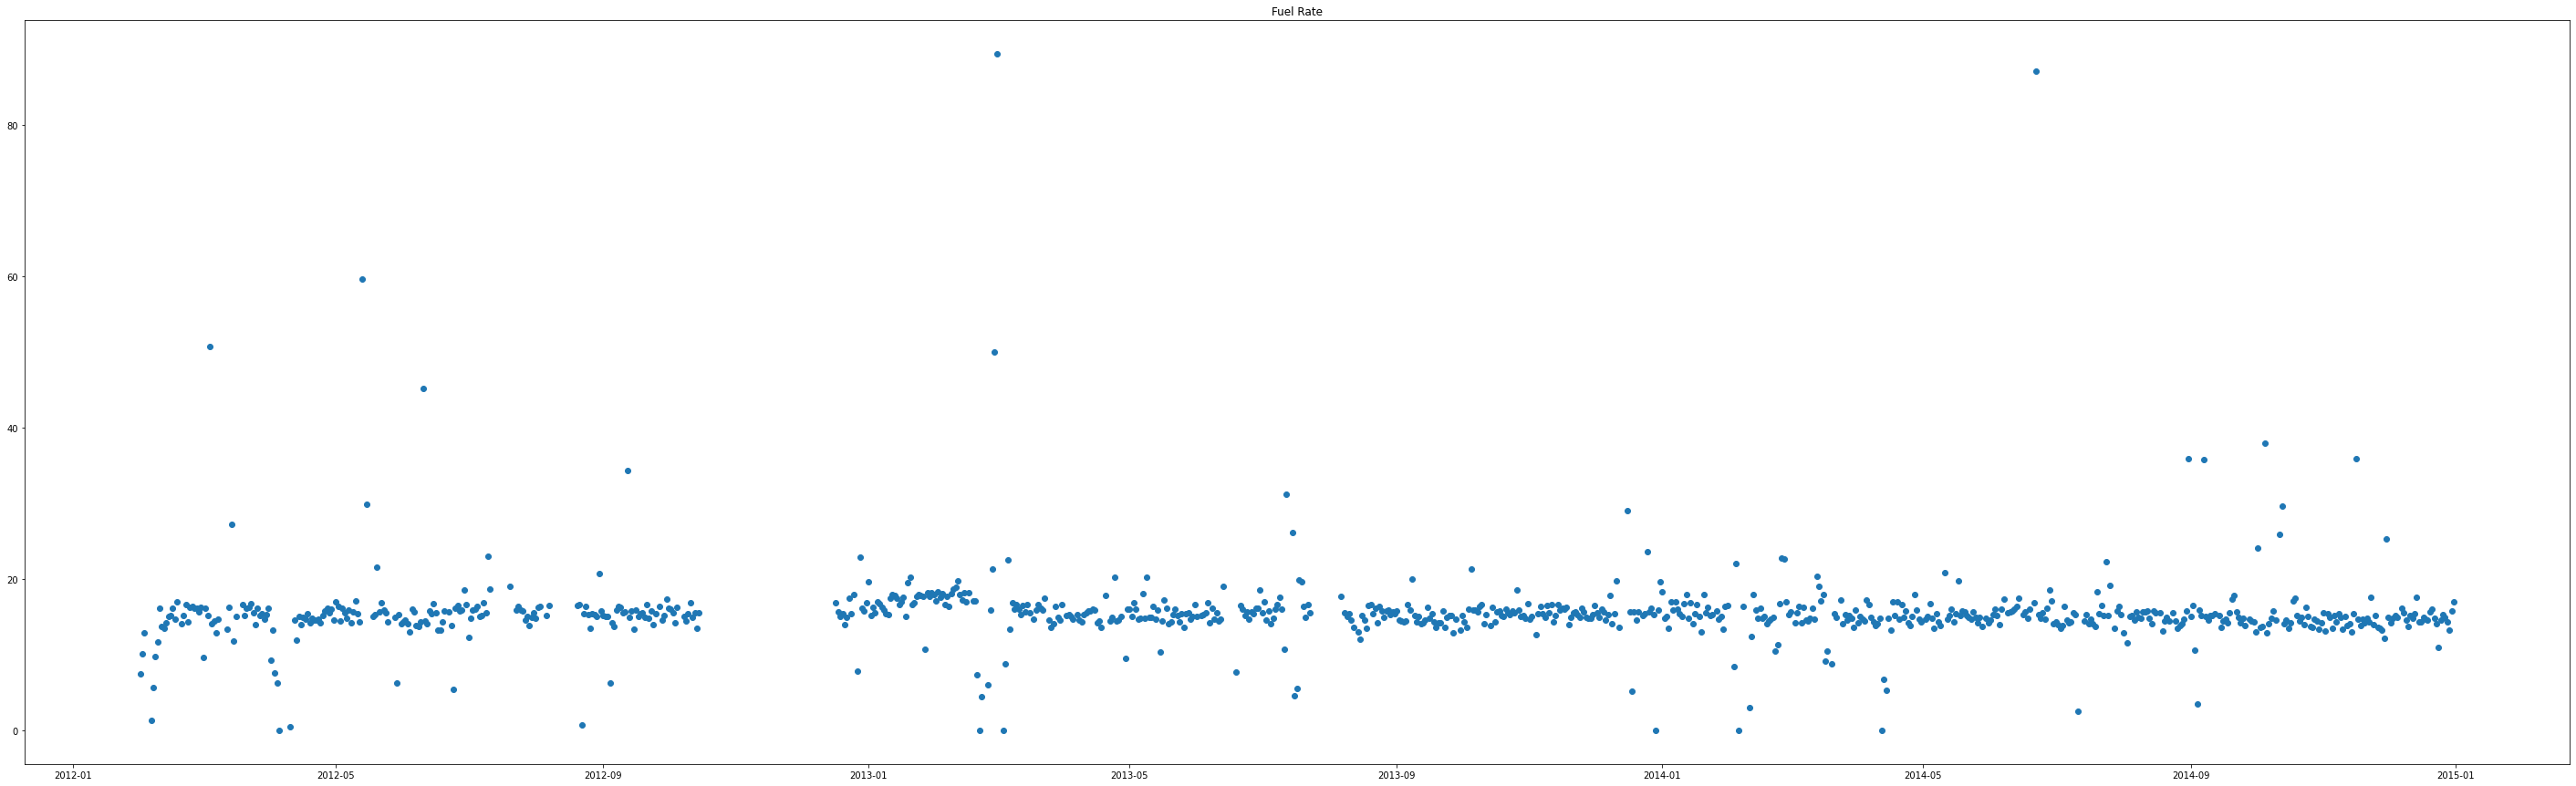

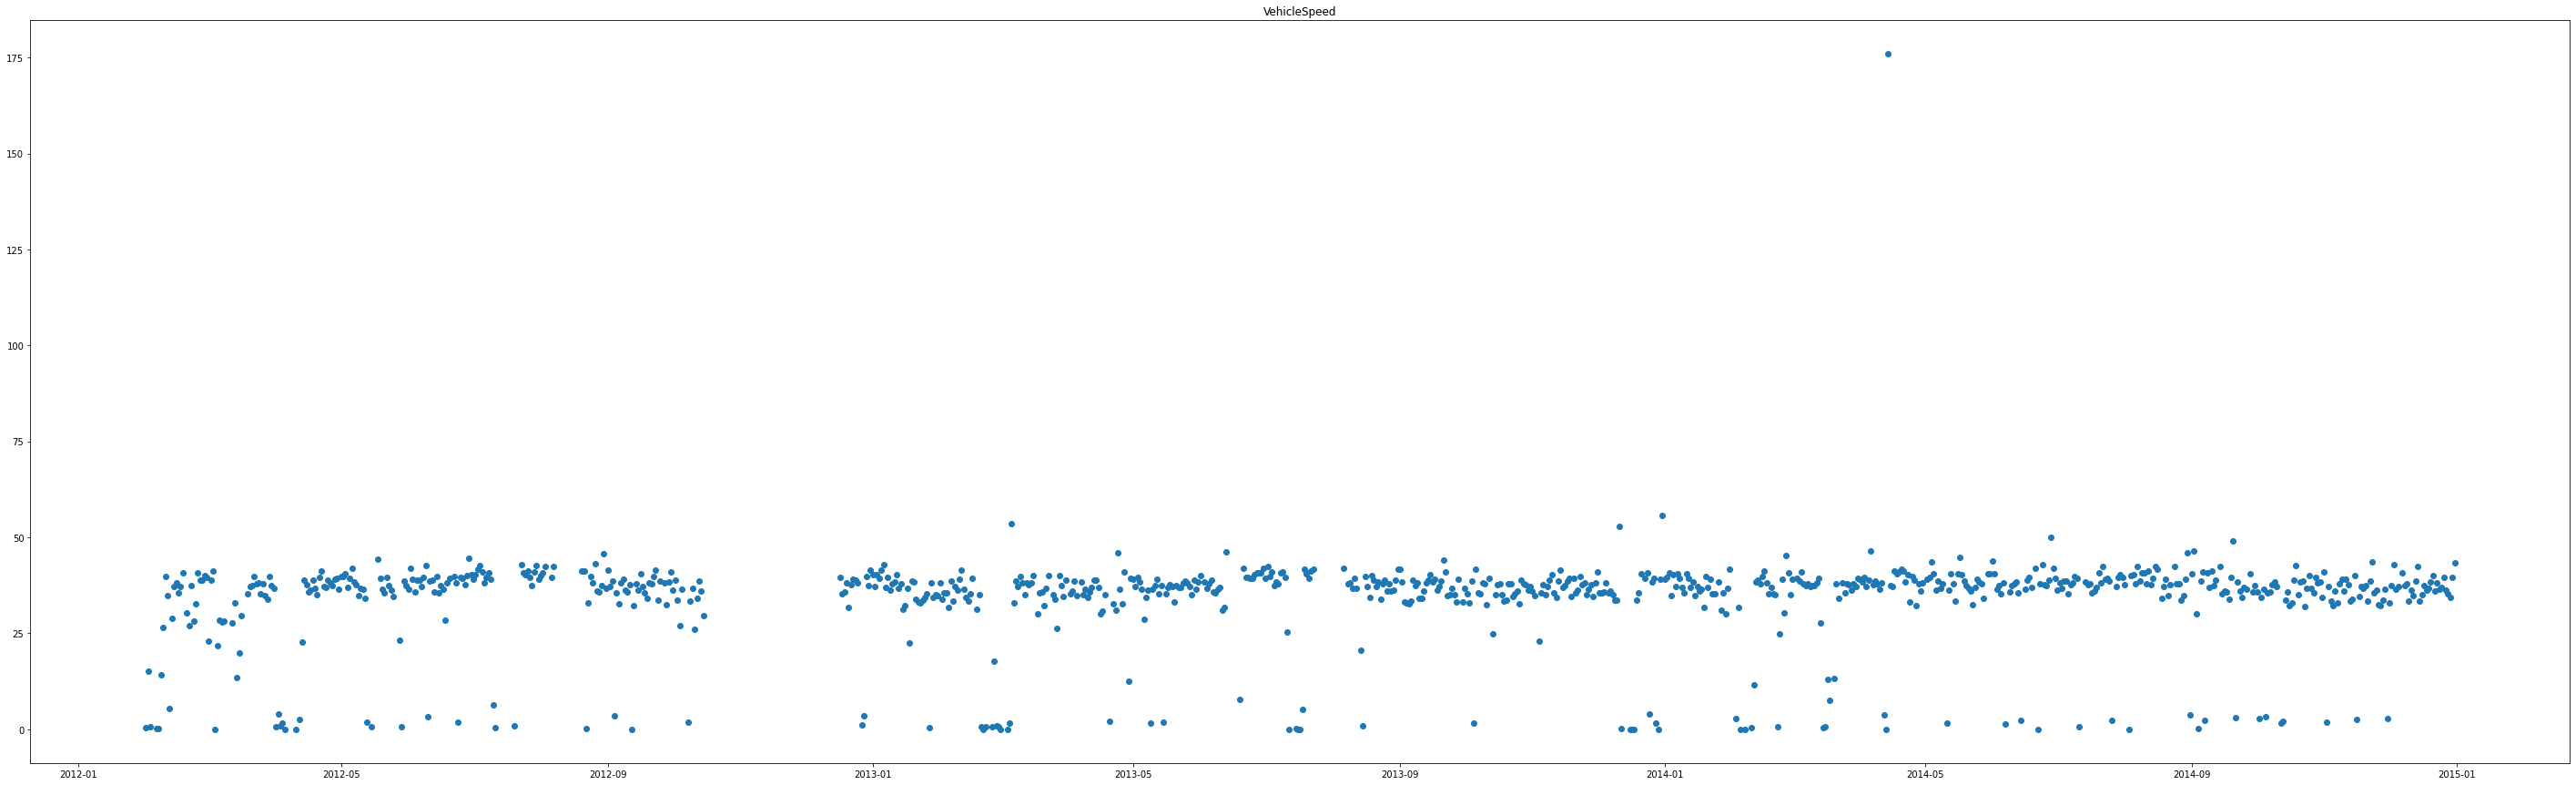

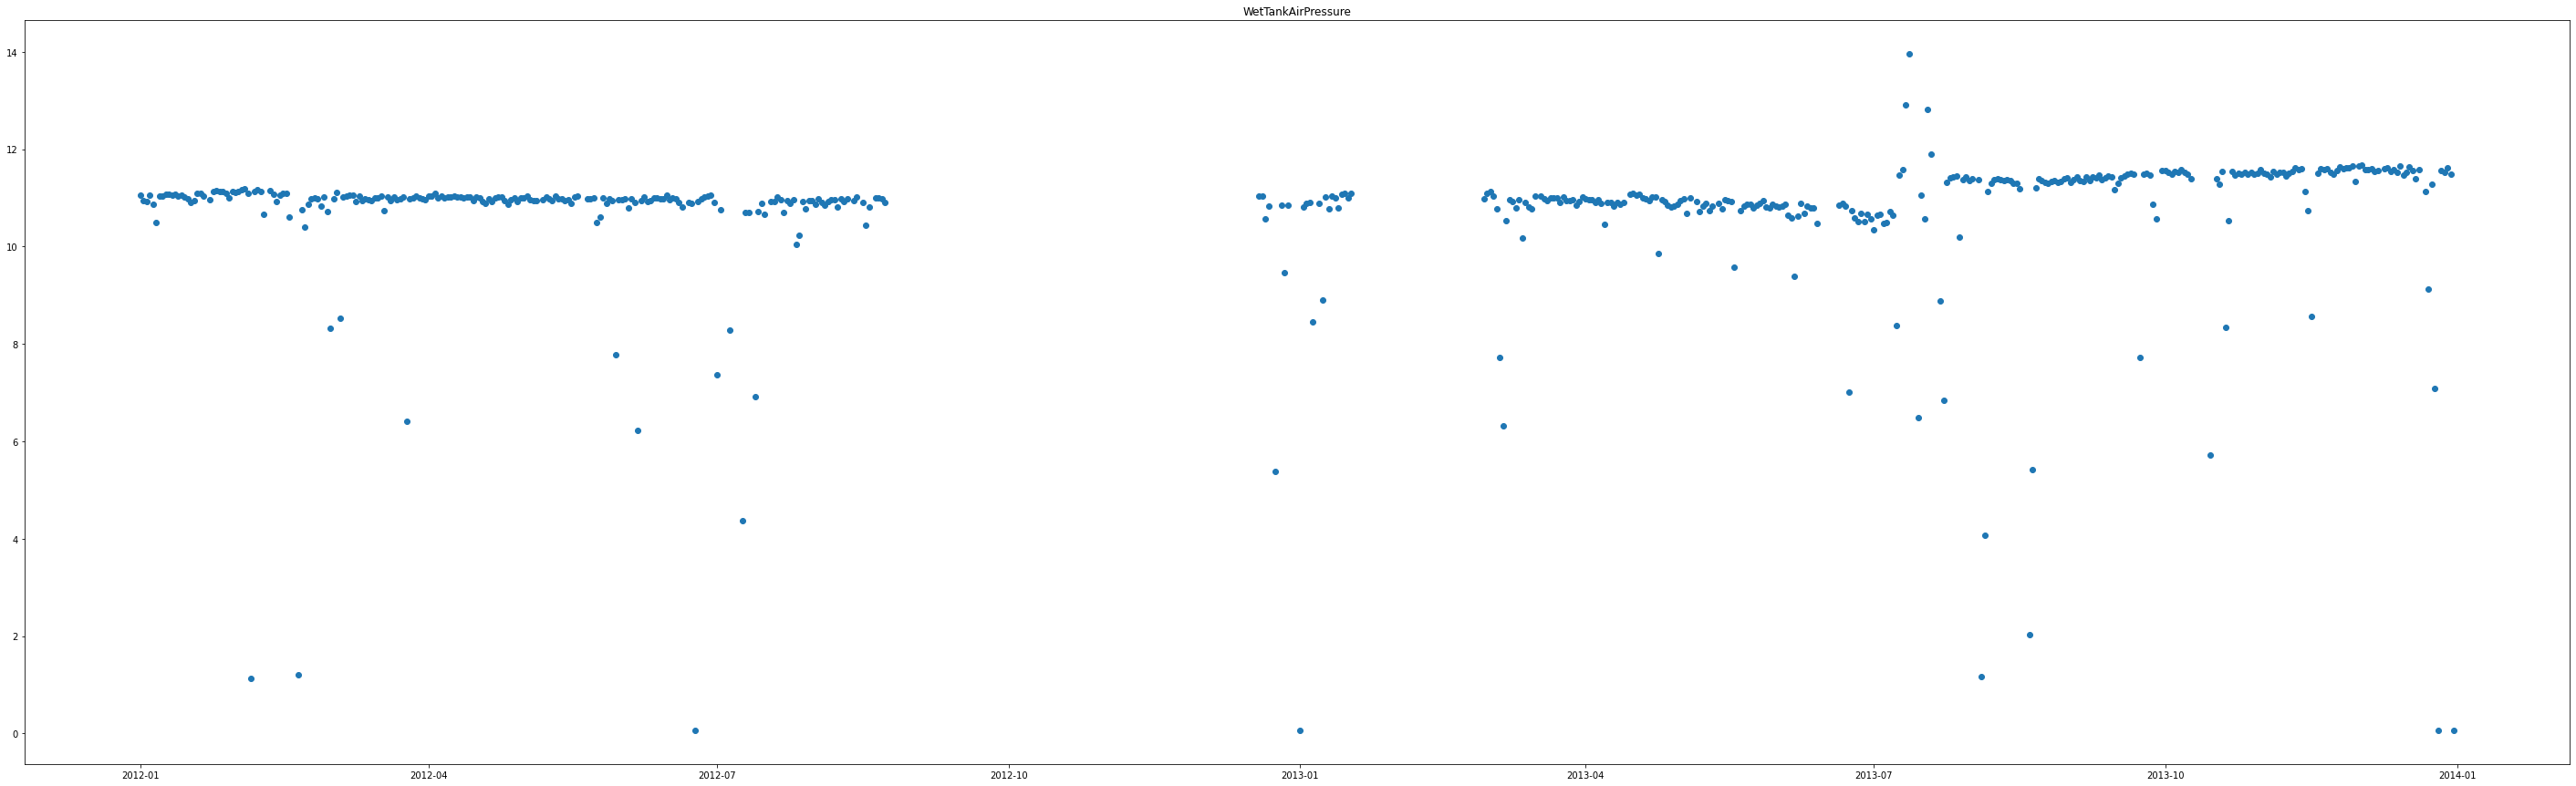

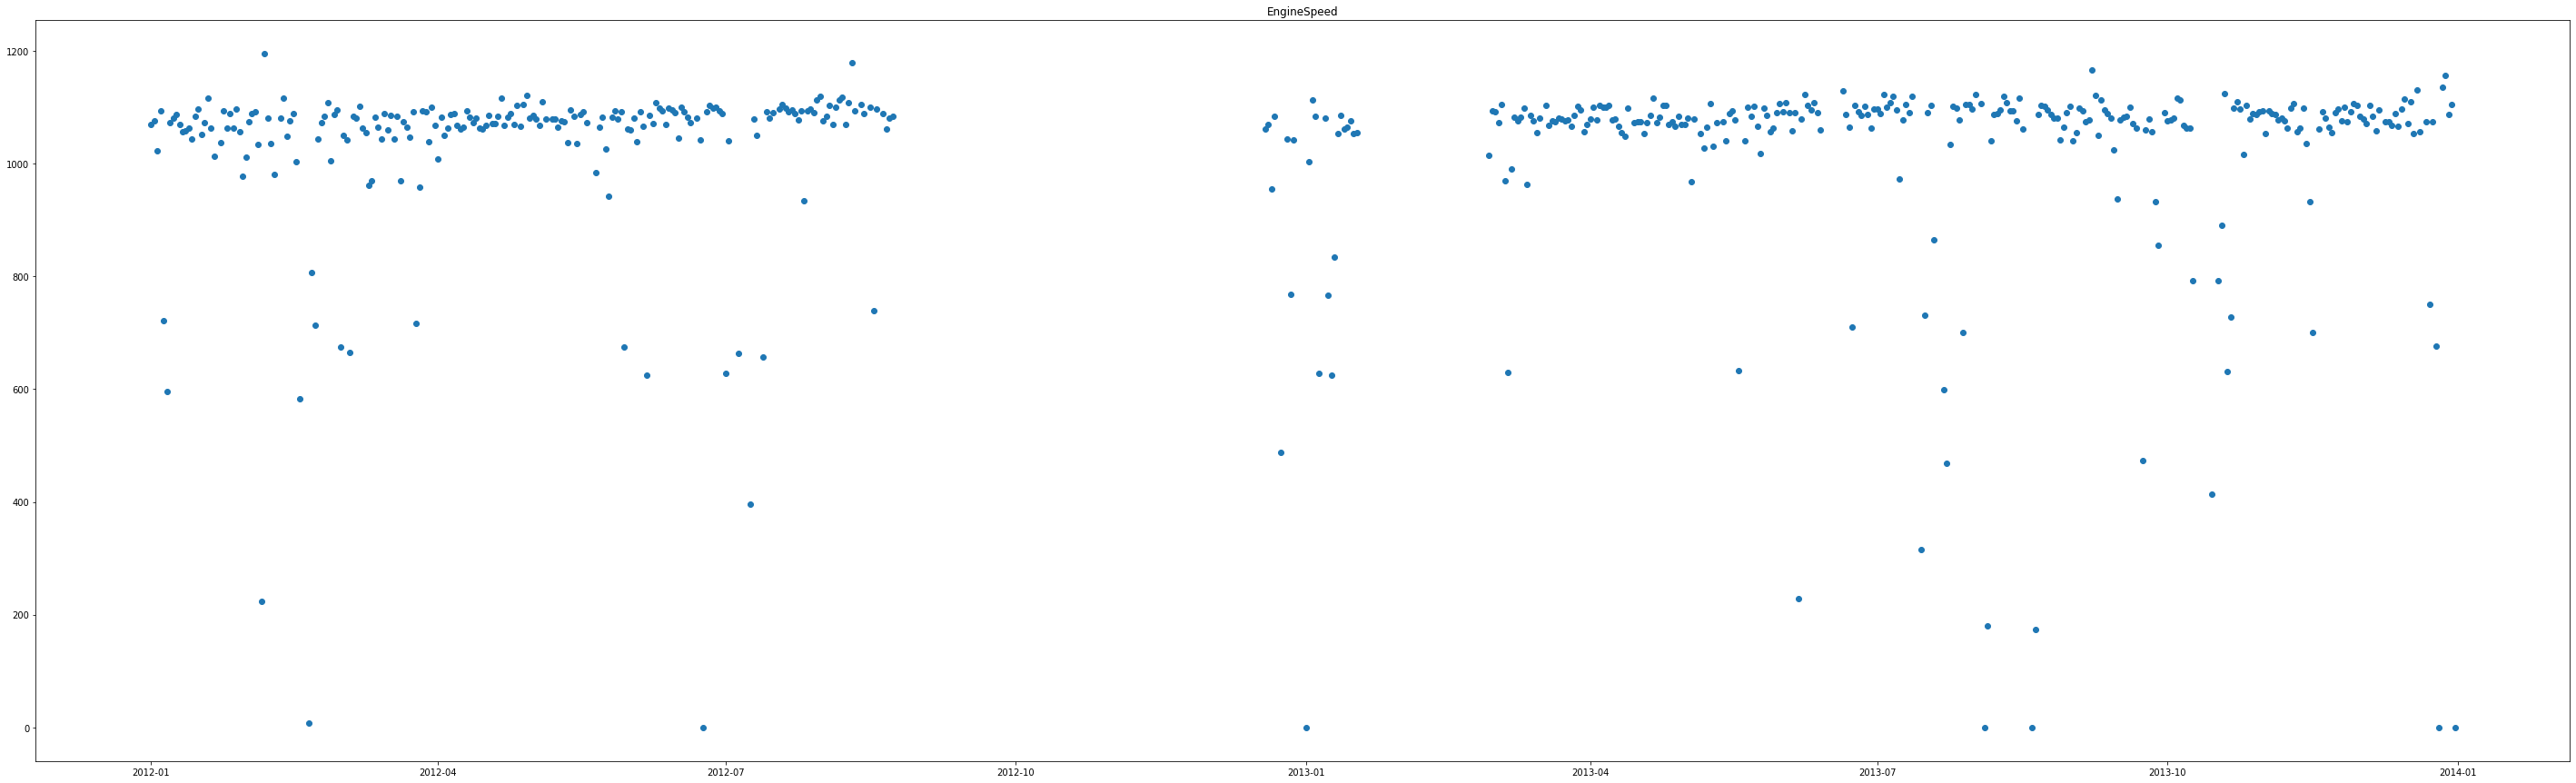

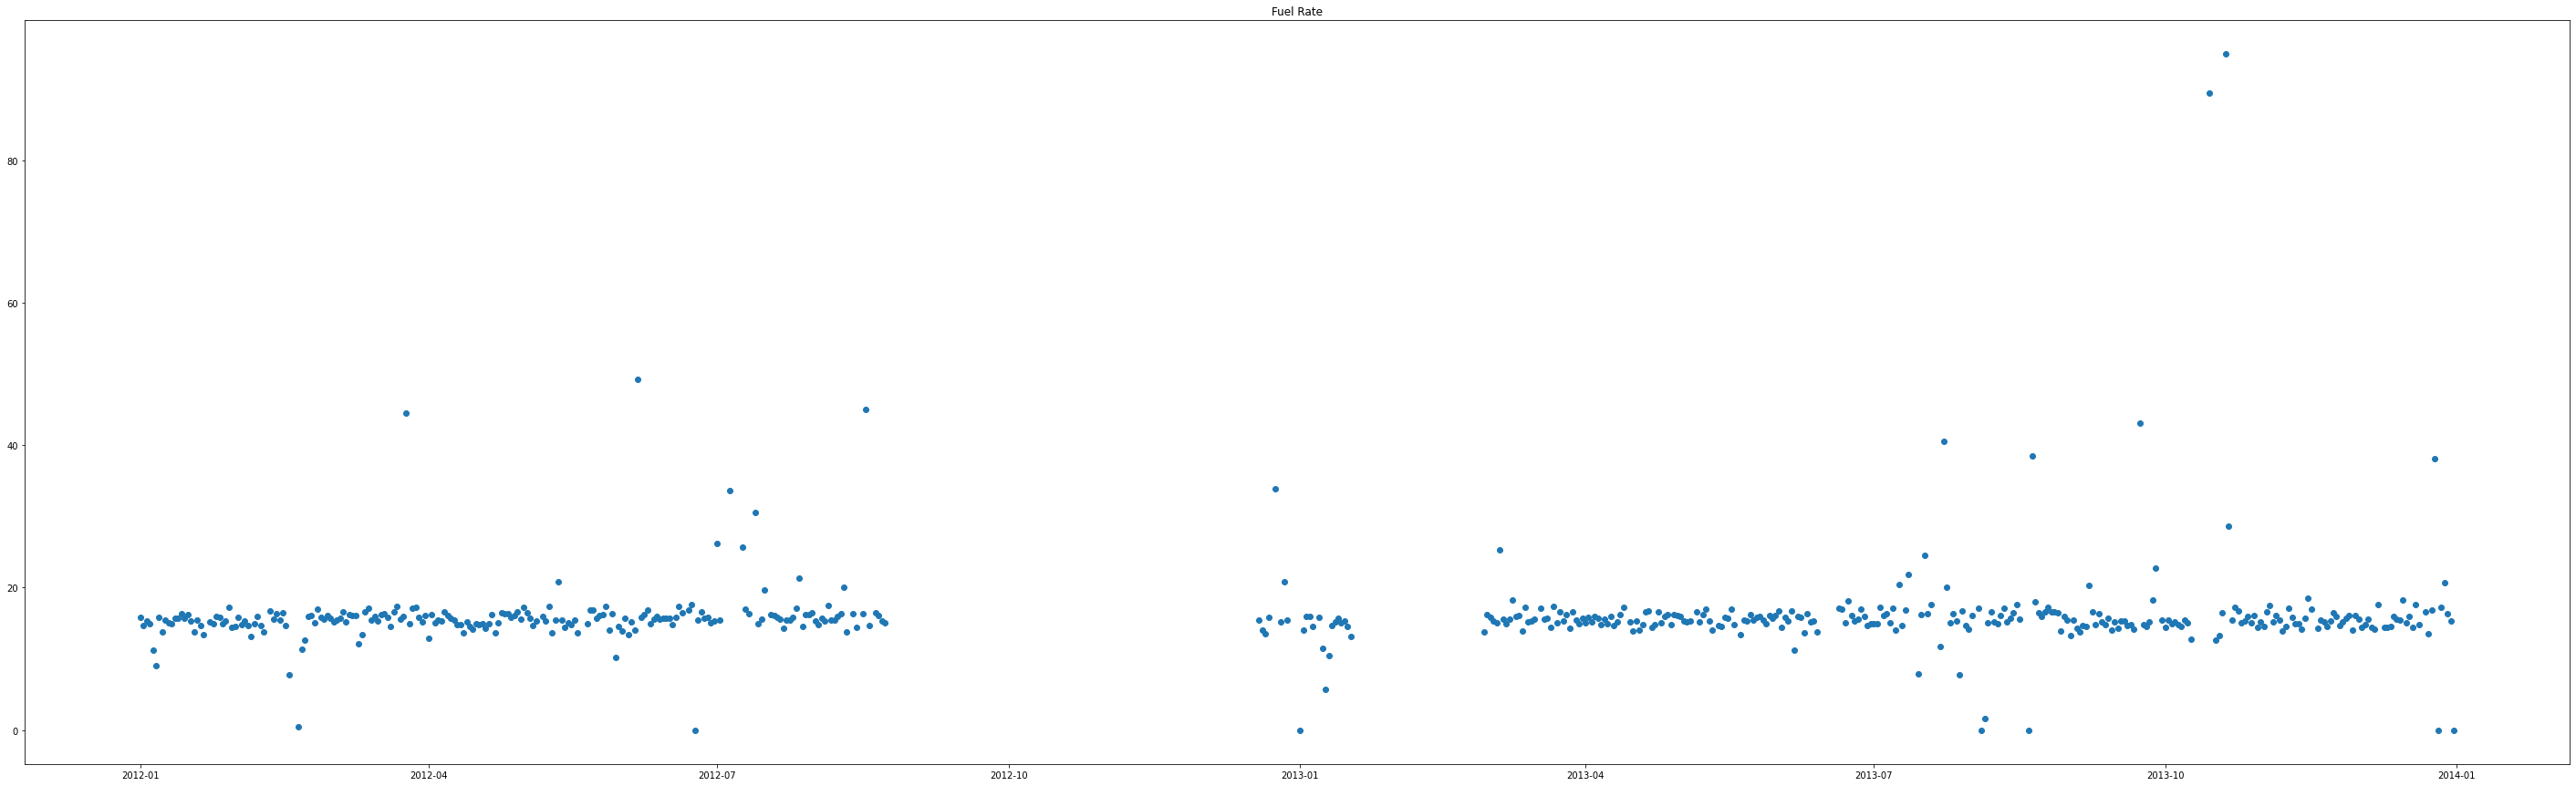

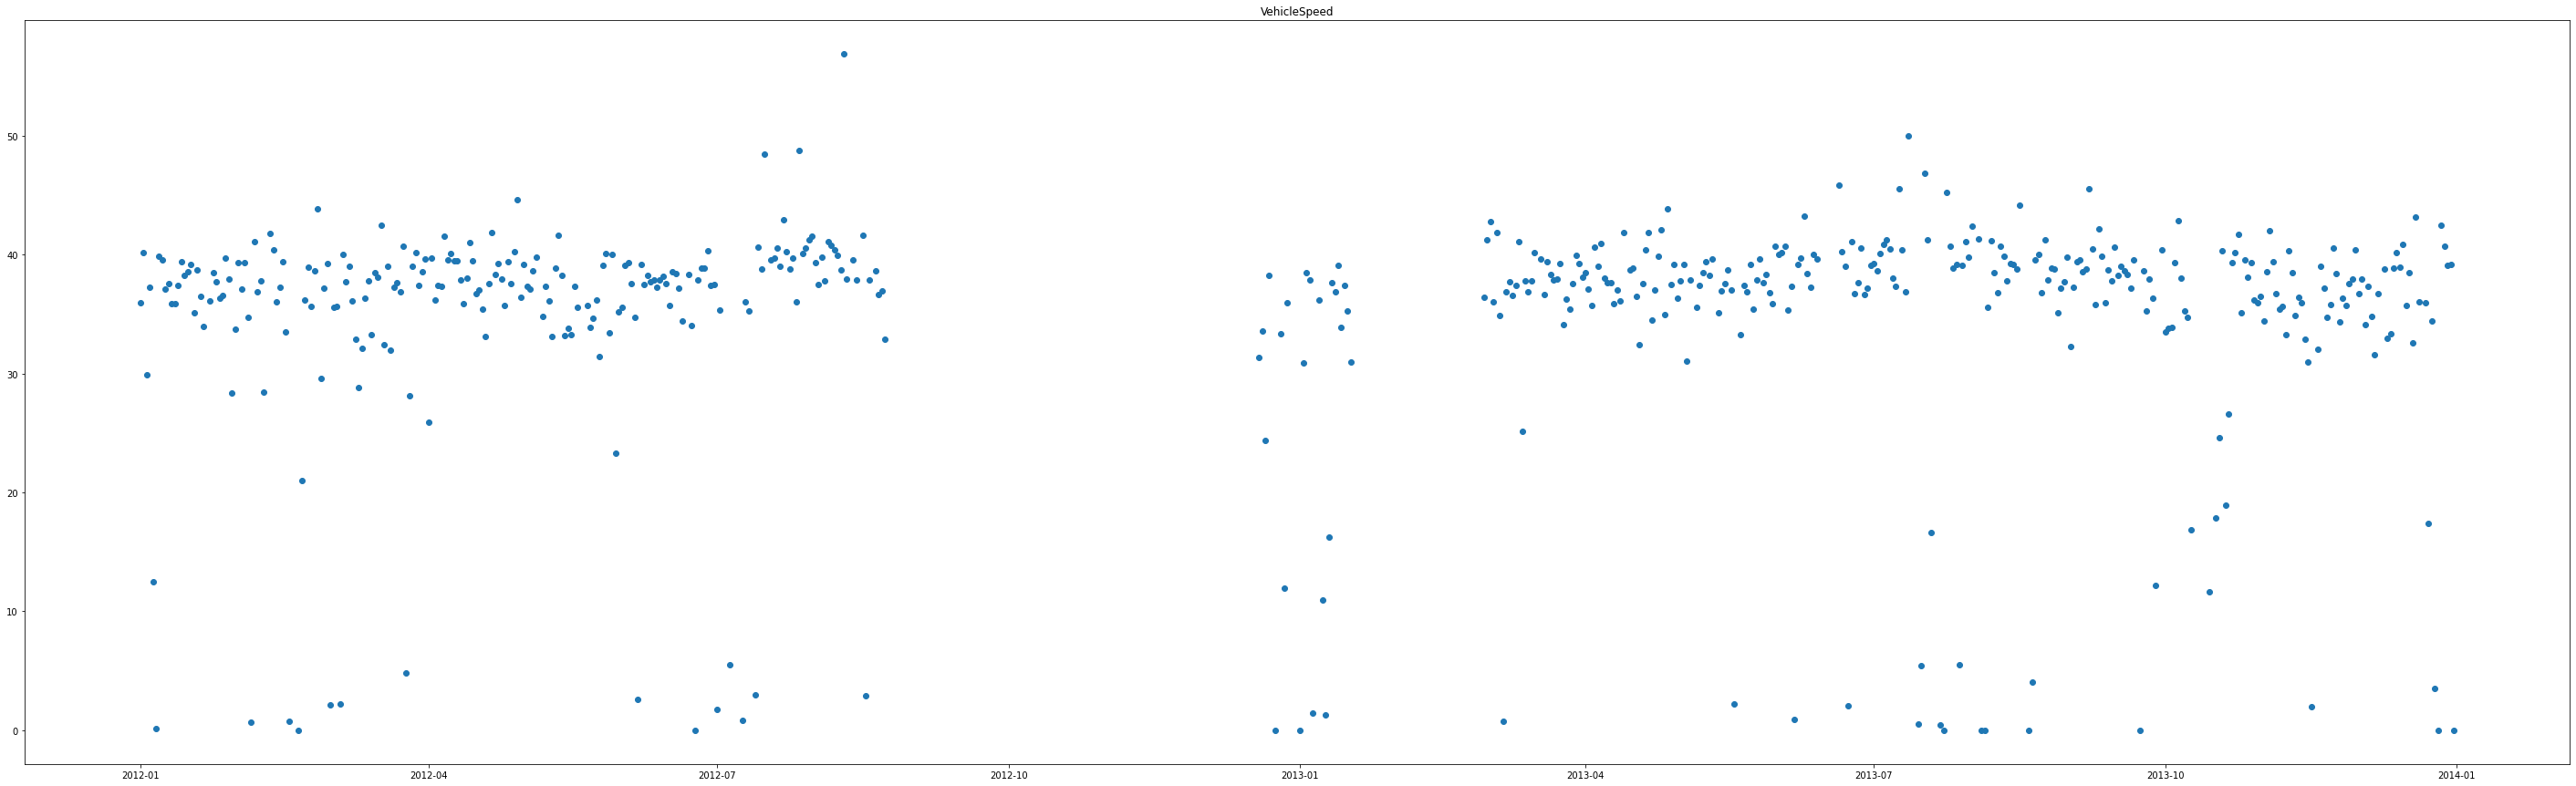

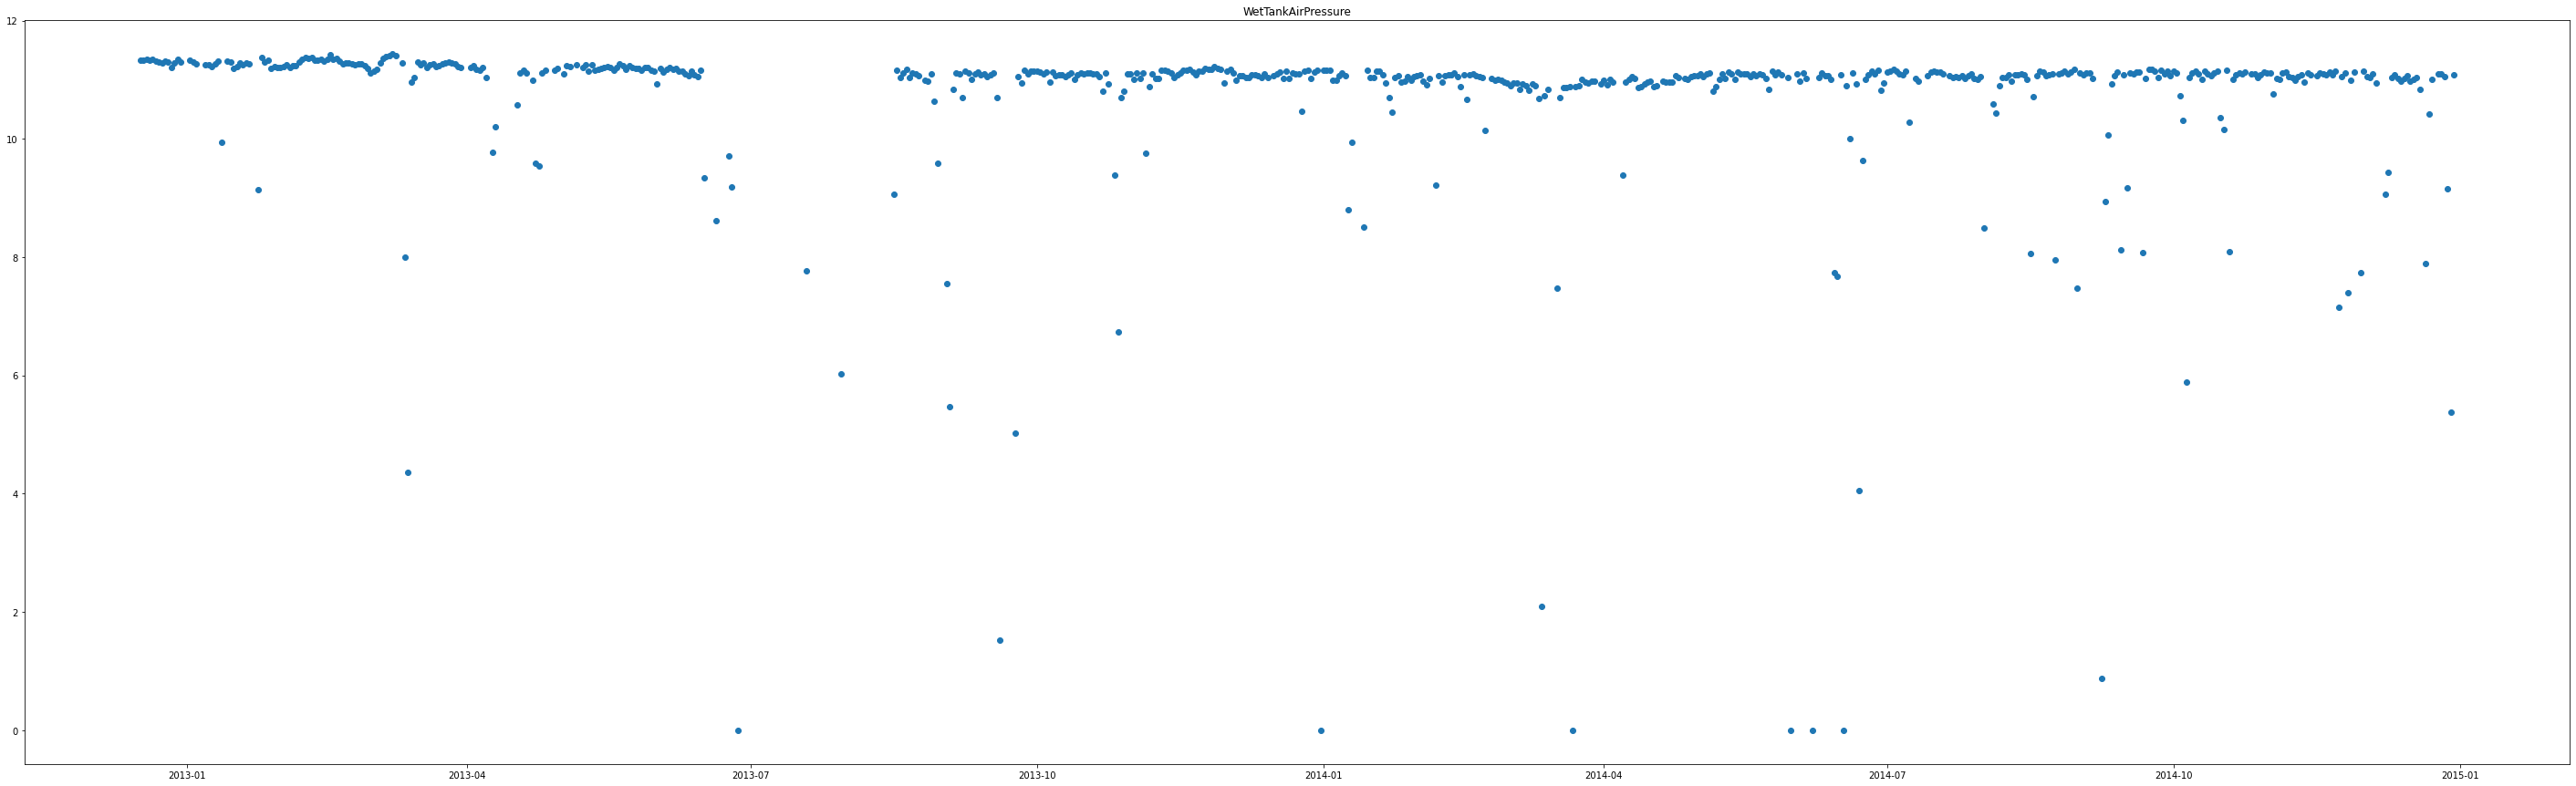

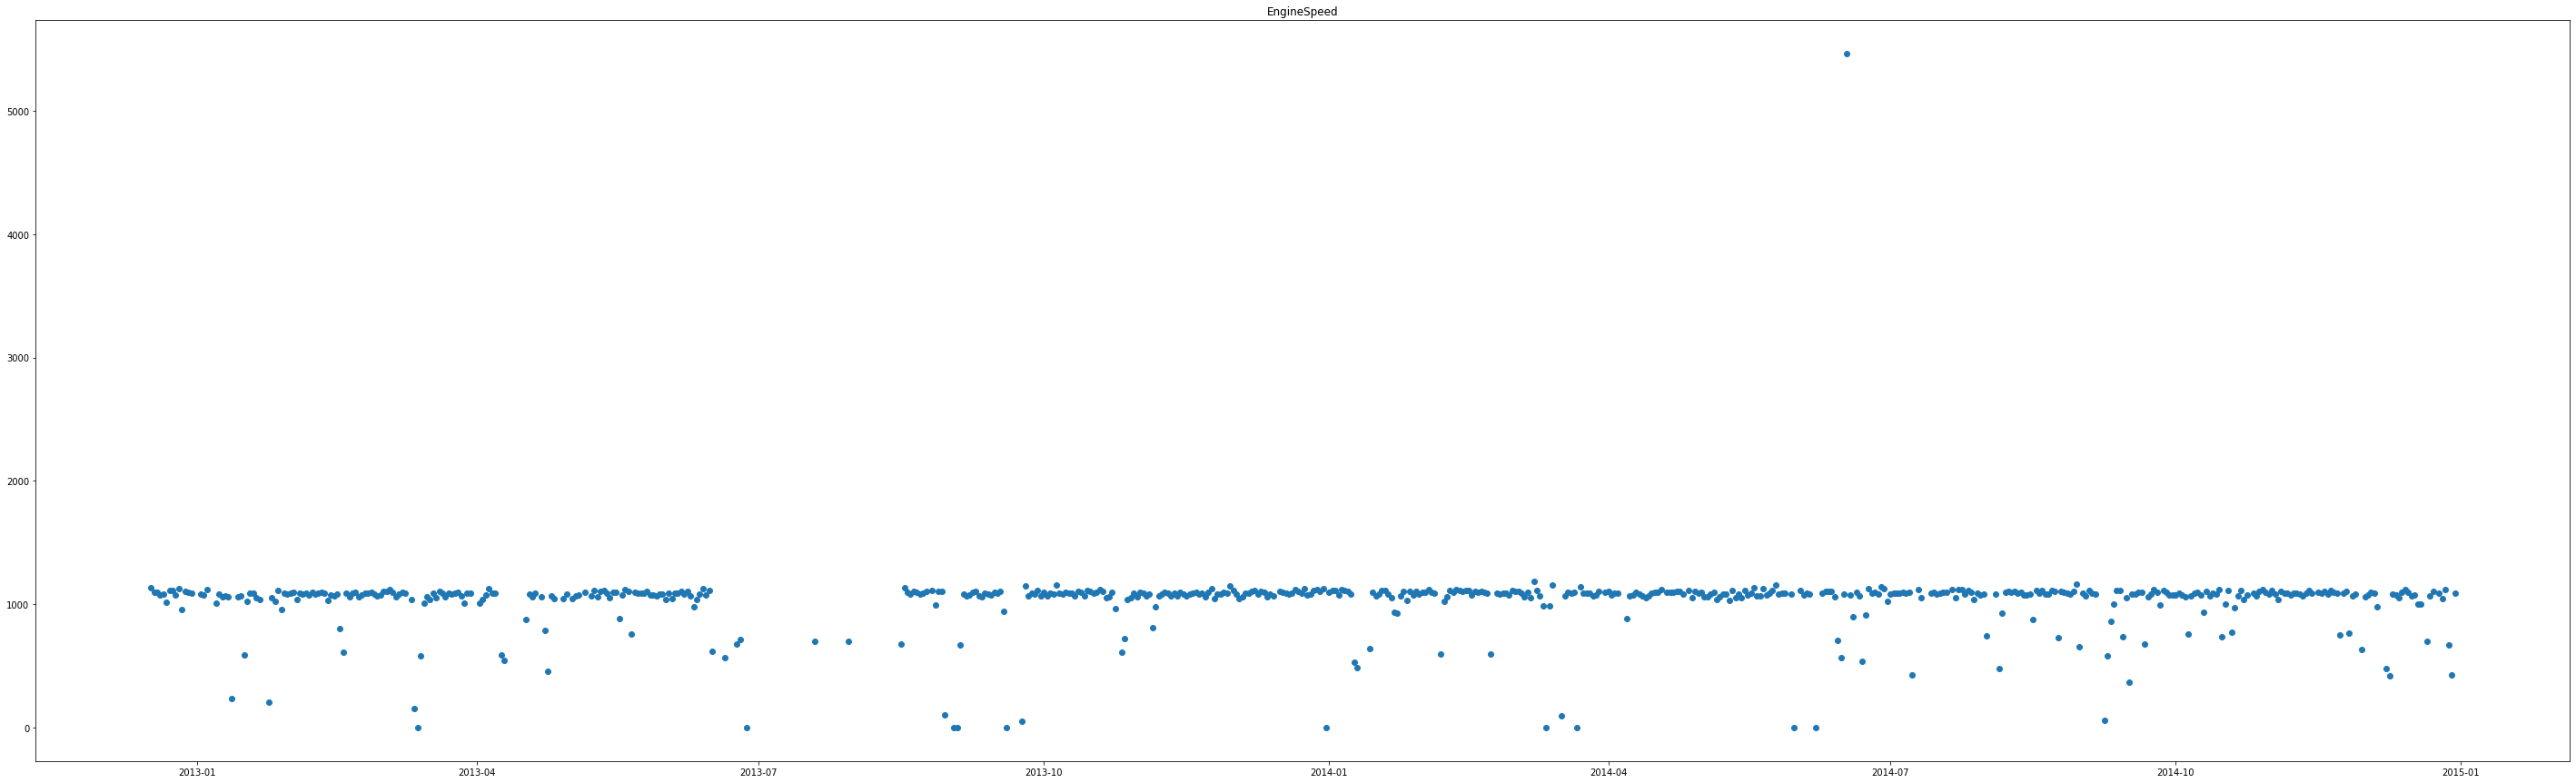

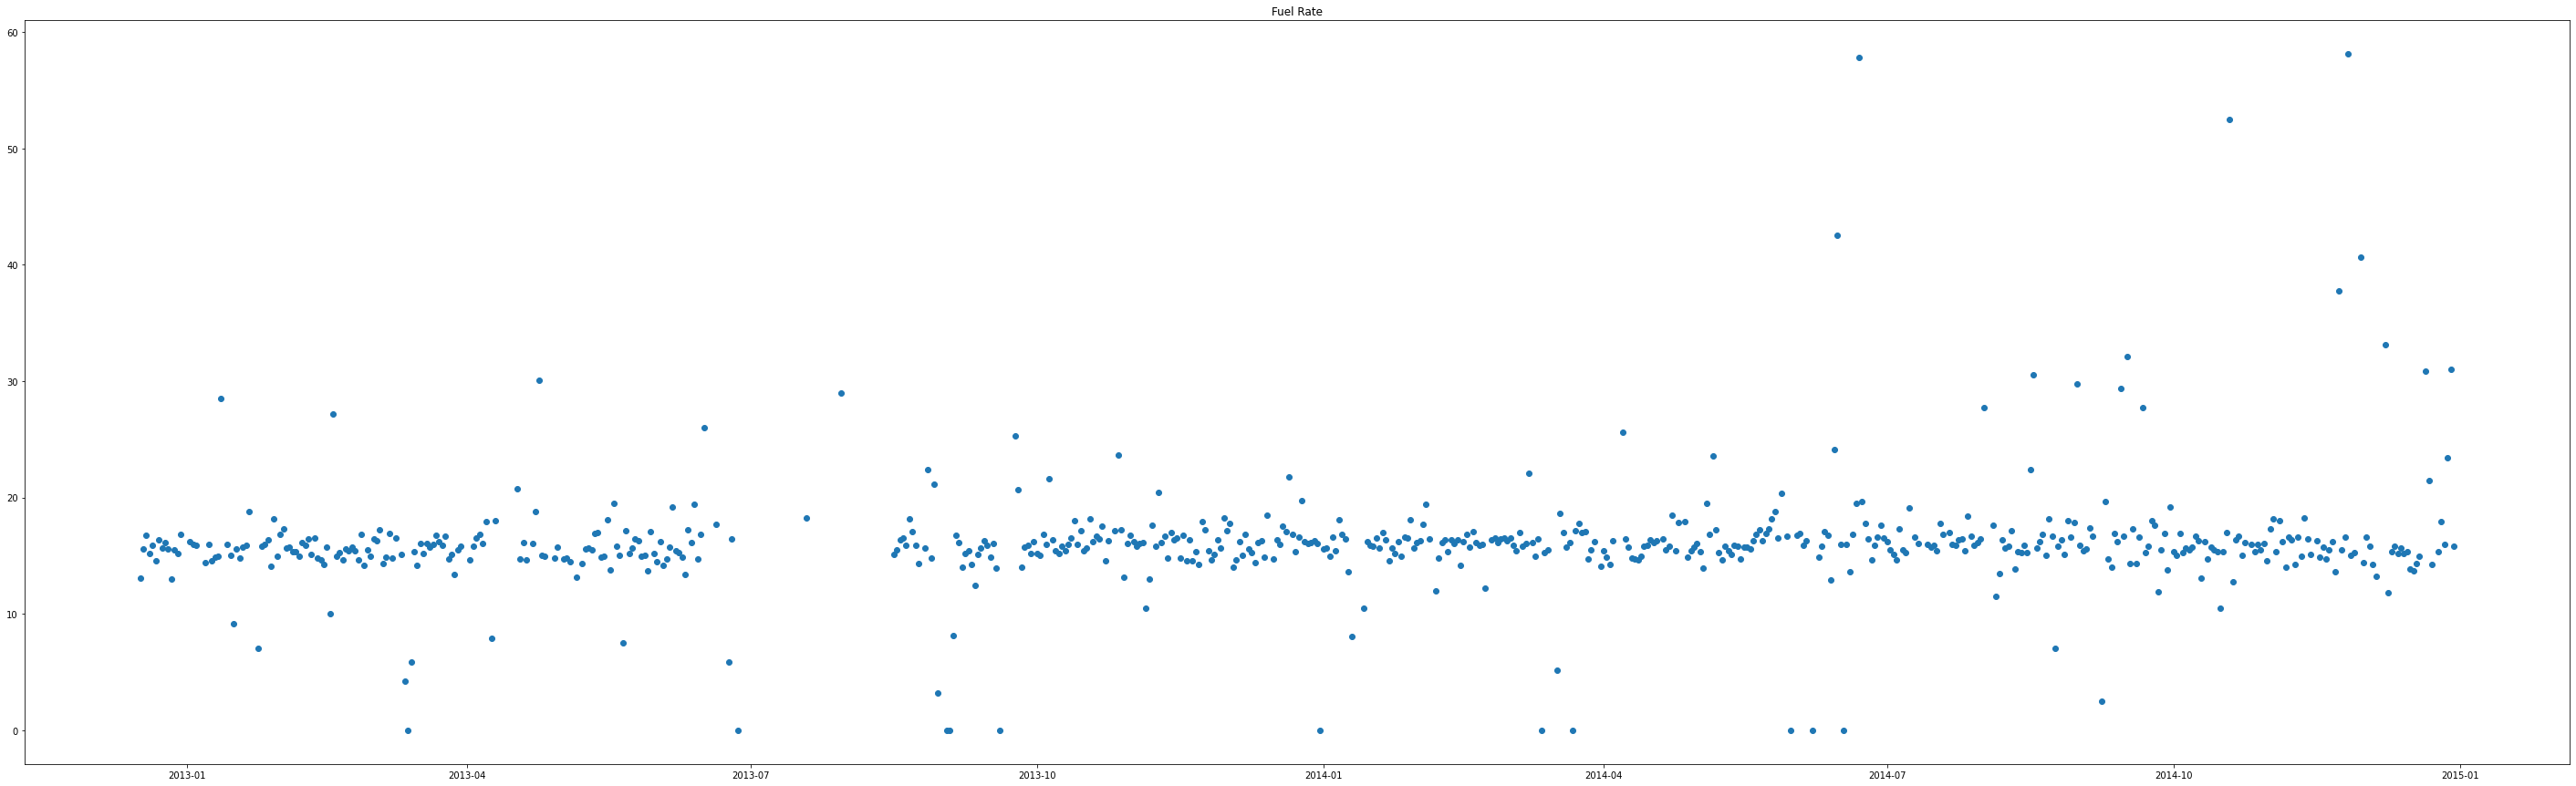

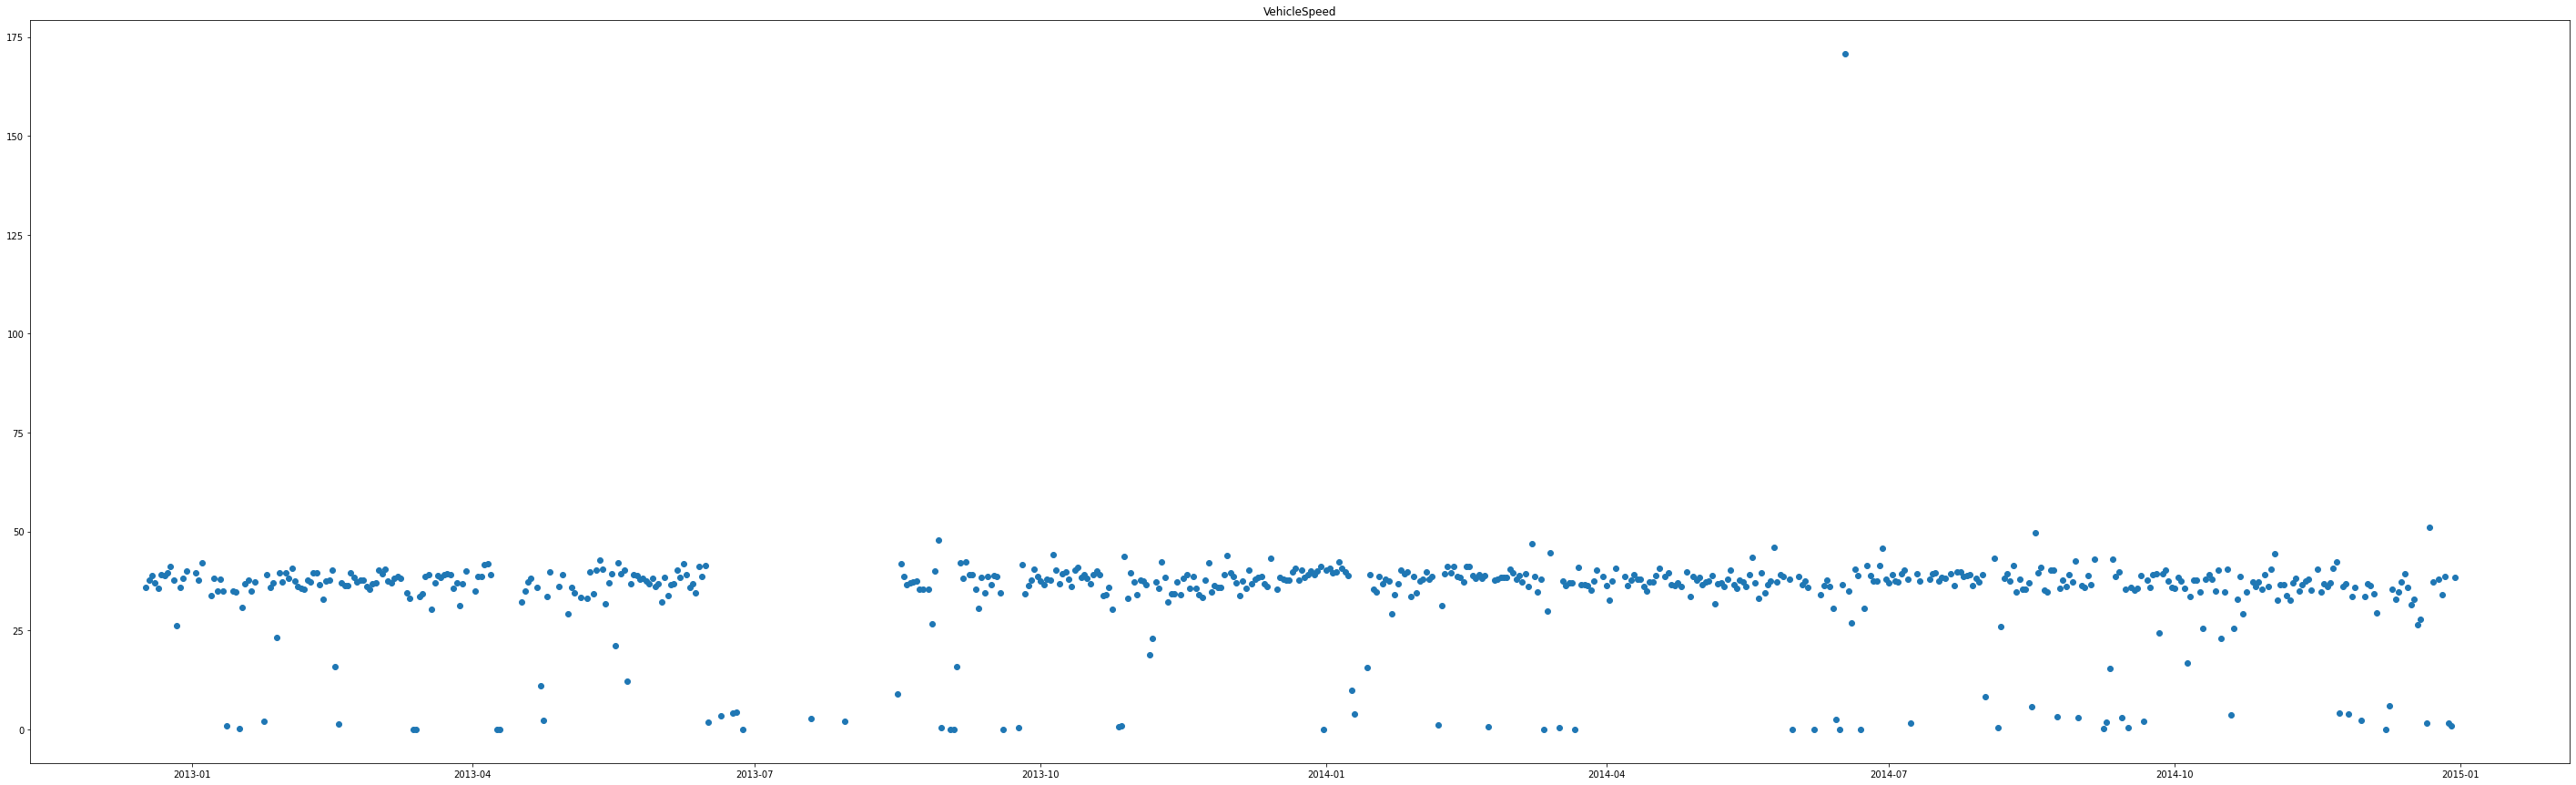

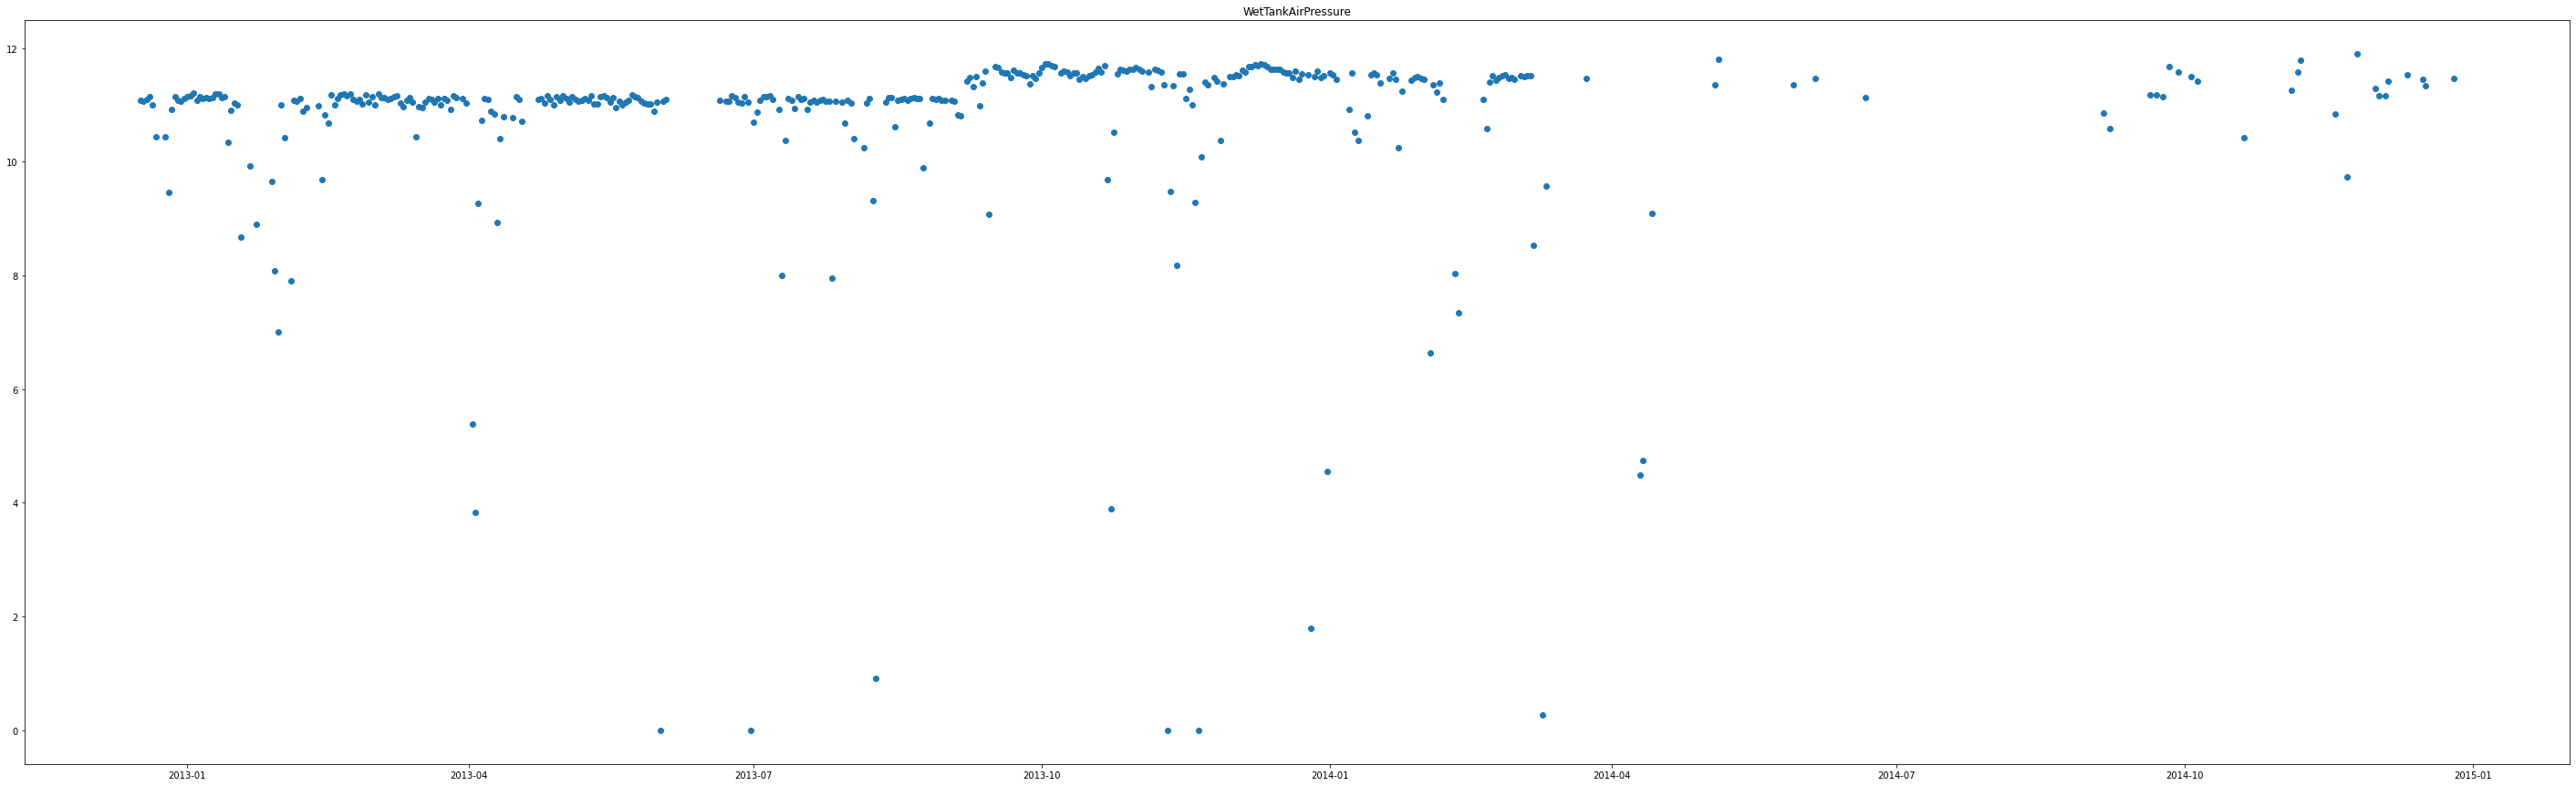

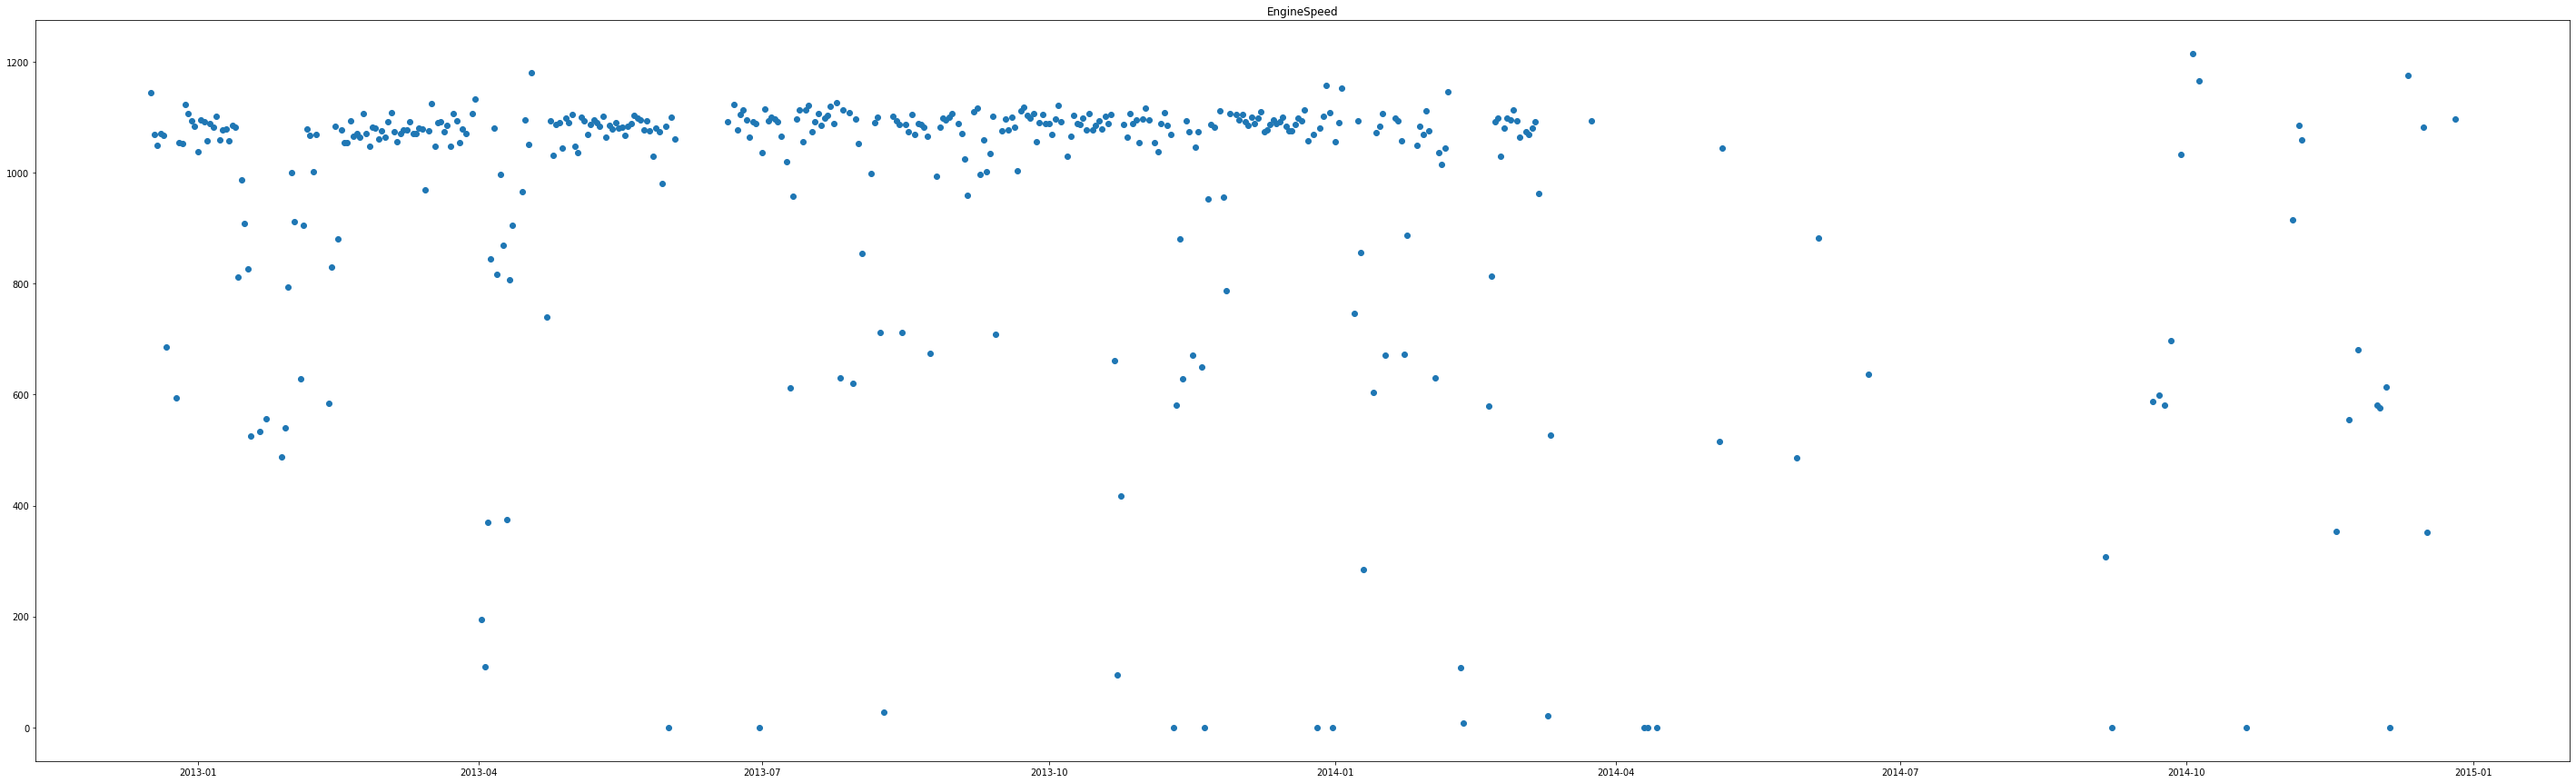

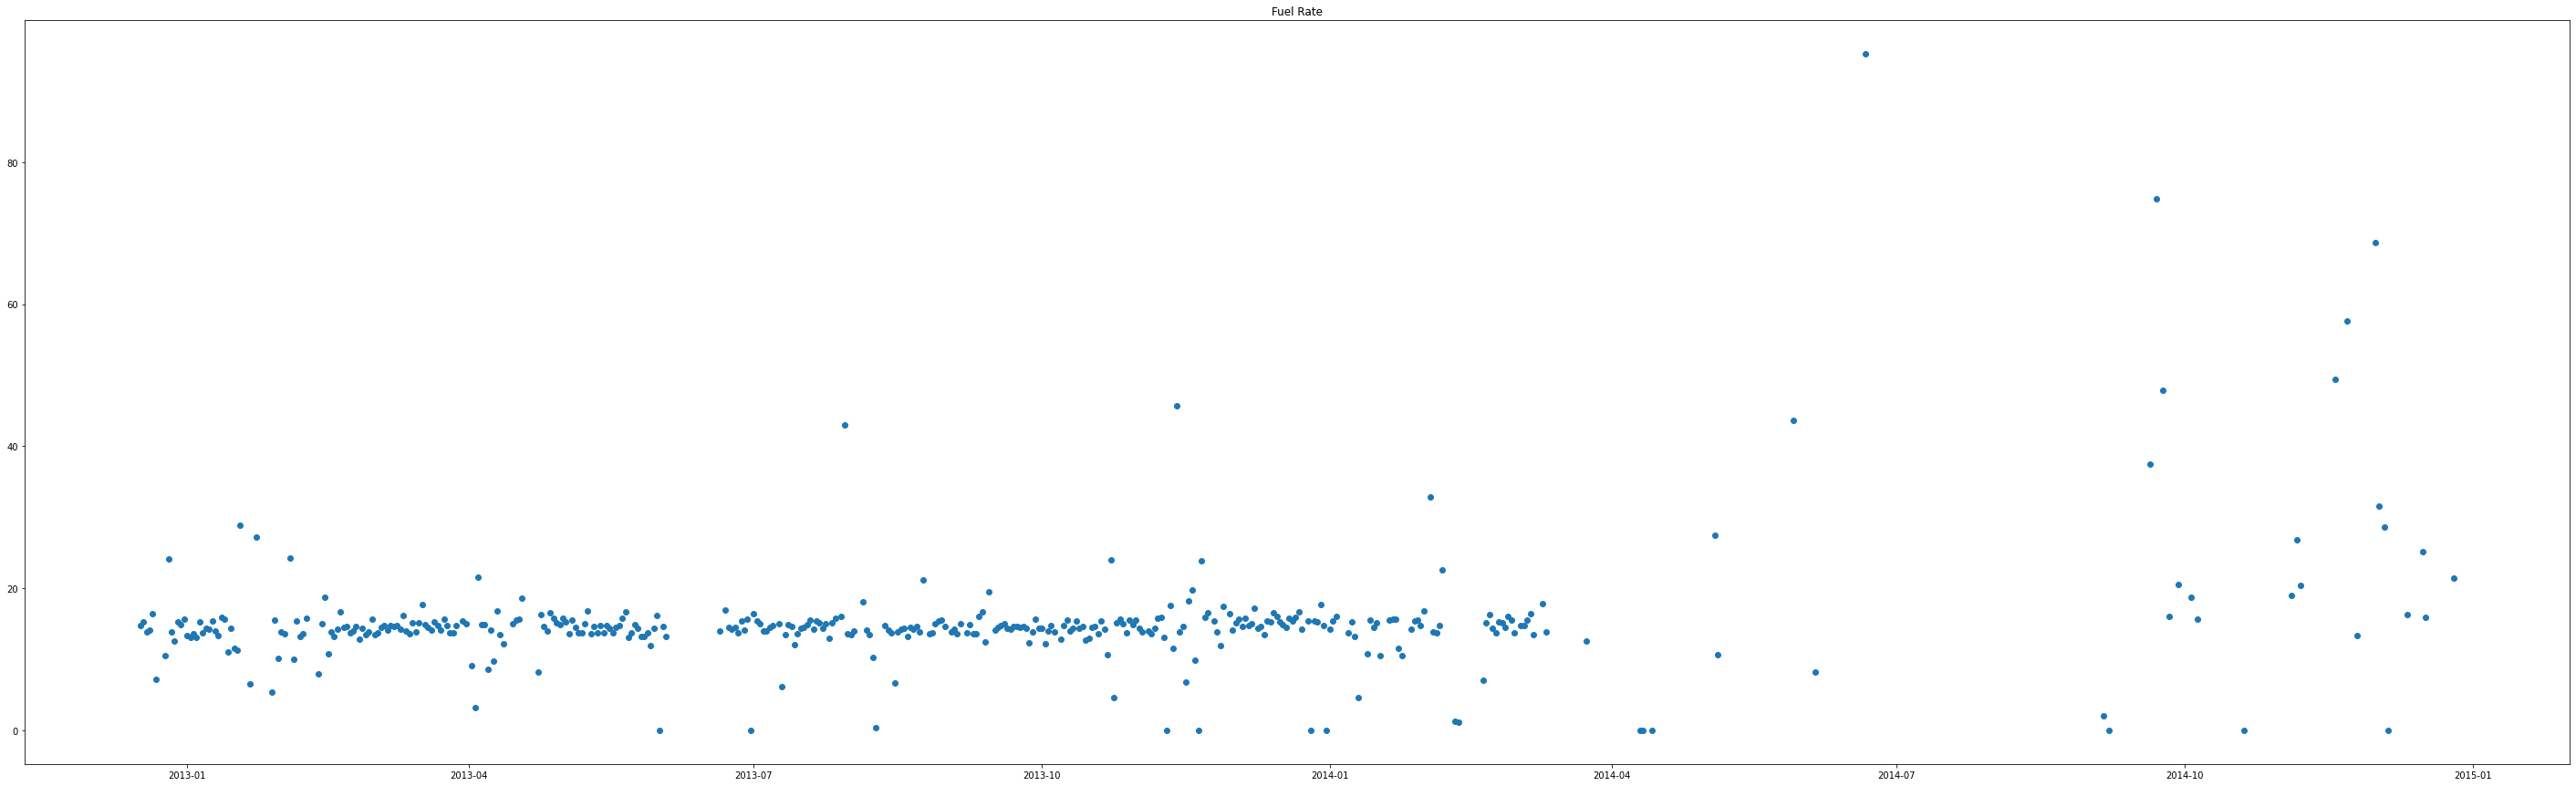

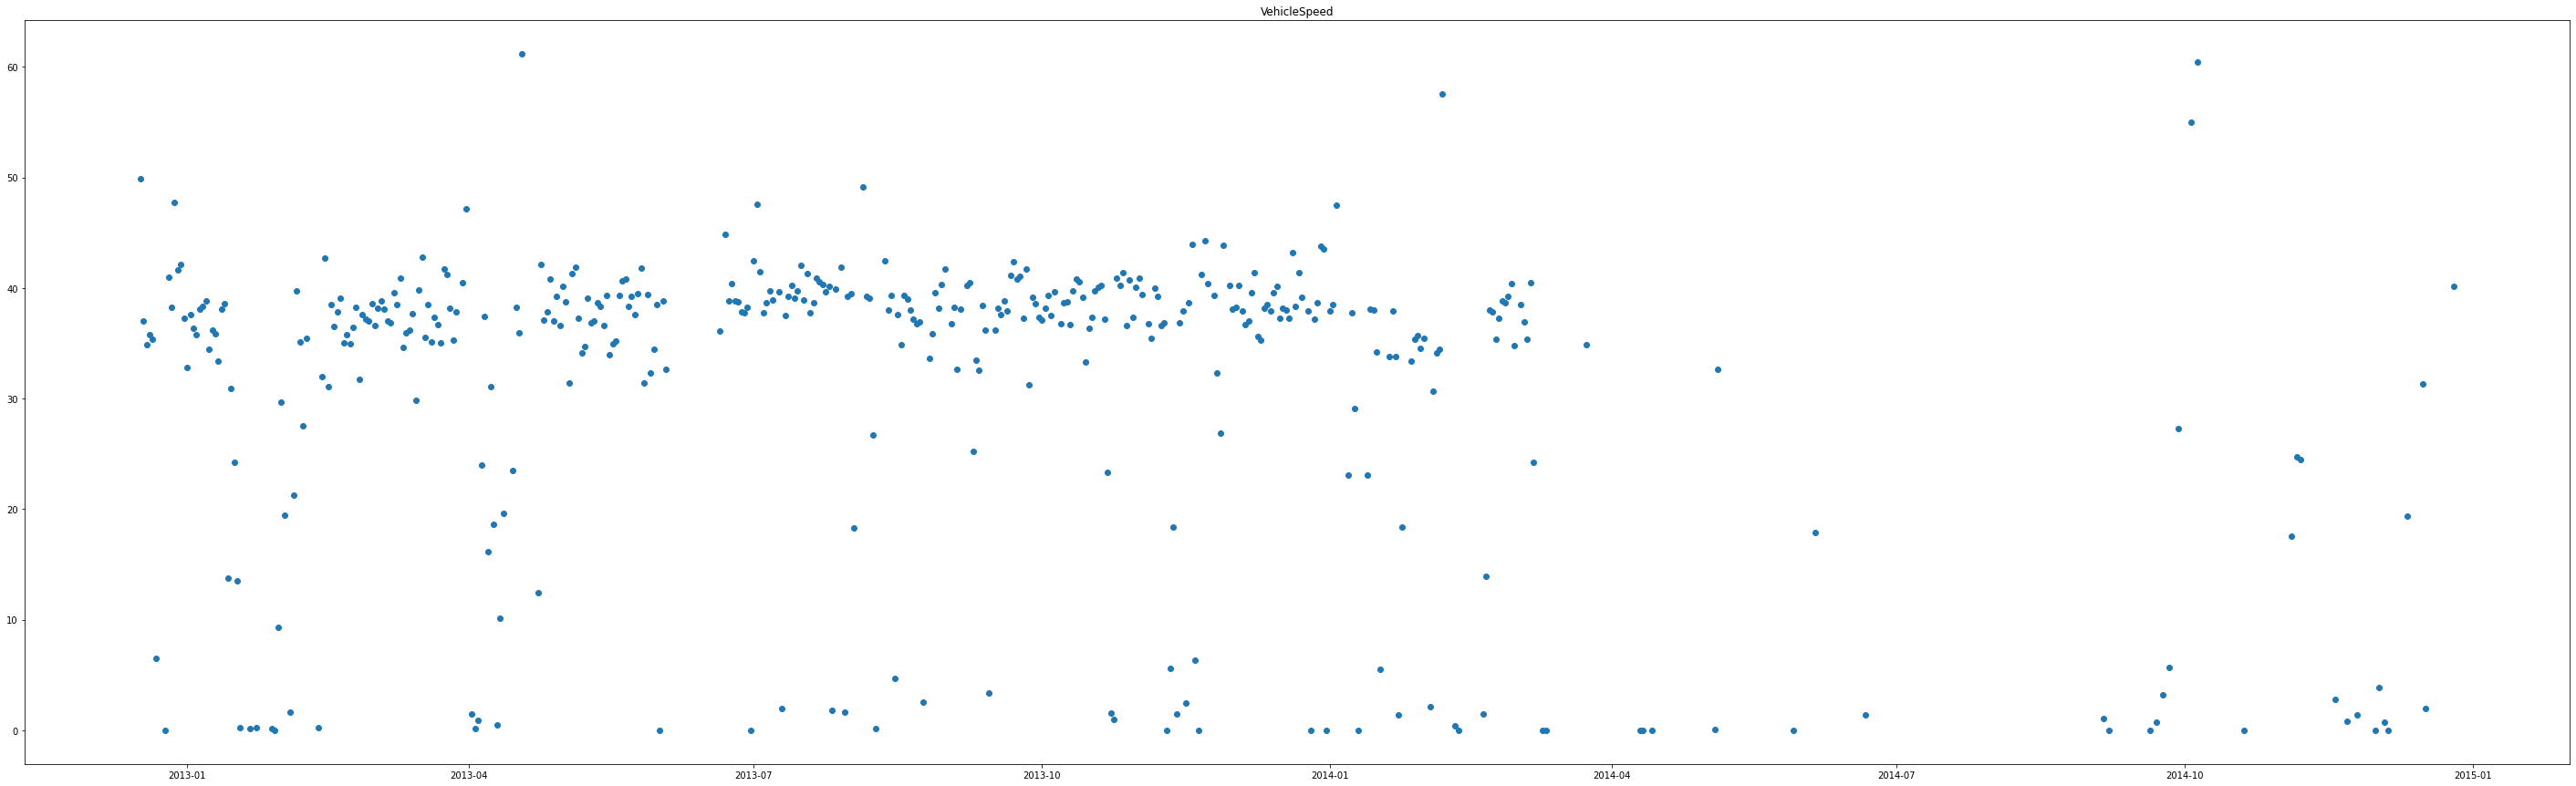

In [8]:
for set_num in ['370', '371', '372', '375']:
    data = pickles['data-'+set_num]
    data = data.resample("24H").mean()
    cols_to_check = ['WetTankAirPressure', 'EngineSpeed', 'Fuel Rate', 'VehicleSpeed']
    for col in cols_to_check:
        f = plt.figure(figsize=(50, 15))
        plt.scatter(x=data.index, y=data[col])
        plt.title(col)
        plt.show()